In [ ]:
import pandas as pd
import numpy as np


df = pd.read_csv("/content/Insurance.csv")


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
df.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
for i in range(df.shape[1]):
  print(f"Column {df.columns[i]}:")
  print(df.iloc[:,i].unique())
  print(df.iloc[:,i].value_counts())

Column age:
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64
Column sex:
['female' 'male']
sex
male      676
female    662
Name: count, dtype: int64
Column bmi:
[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63 

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Check for any duplicated rows
duplicates = df.duplicated()
print(f"Number of duplicated rows: {duplicates.sum()}")
print(df[duplicates])


Number of duplicated rows: 1
     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


In [ ]:
df = df.drop_duplicates()
print(f"Number of rows after dropping duplicates: {df.shape[0]}")

Number of rows after dropping duplicates: 1337


In [ ]:
duplicates = df.duplicated()
print(f"Number of duplicated rows: {duplicates.sum()}")


Number of duplicated rows: 0


In [ ]:
# Calculate the median of the 'charges' column directly
median_threshold = df['charges'].median()
print(f"Median Threshold: {median_threshold}")


Median Threshold: 9386.1613


In [ ]:
# Define the threshold value
threshold_value = 9386.1613

# Convert 'charges' column based on the threshold
df['binary_charges'] = np.where(df['charges'] <= threshold_value, 0, 1)

# Print the updated DataFrame
print(df[['charges', 'binary_charges']])

          charges  binary_charges
0     16884.92400               1
1      1725.55230               0
2      4449.46200               0
3     21984.47061               1
4      3866.85520               0
...           ...             ...
1333  10600.54830               1
1334   2205.98080               0
1335   1629.83350               0
1336   2007.94500               0
1337  29141.36030               1

[1337 rows x 2 columns]


In [ ]:
df

,age,sex,bmi,children,smoker,region,charges,binary_charges
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [ ]:
X = df.drop(["charges", "binary_charges"], axis=1)
y = df["binary_charges"]

In [ ]:
# Count the occurrences of 0s and 1s in the binary_charges column
counts = df['binary_charges'].value_counts()

# Print the counts
print(counts)

binary_charges
0    669
1    668
Name: count, dtype: int64


In [ ]:
y.info()

<class 'pandas.core.series.Series'>
Index: 1337 entries, 0 to 1337
Series name: binary_charges
Non-Null Count  Dtype
--------------  -----
1337 non-null   int64
dtypes: int64(1)
memory usage: 20.9 KB


In [ ]:
# Convert boolean columns to integers
bool_columns = X.select_dtypes(include=['bool']).columns
X[bool_columns] = X[bool_columns].astype(int)
X=pd.get_dummies(X,drop_first=True)
print(X)

      age     bmi  children  sex_male  smoker_yes  region_northwest  \
0      19  27.900         0         0           1                 0   
1      18  33.770         1         1           0                 0   
2      28  33.000         3         1           0                 0   
3      33  22.705         0         1           0                 1   
4      32  28.880         0         1           0                 1   
...   ...     ...       ...       ...         ...               ...   
1333   50  30.970         3         1           0                 1   
1334   18  31.920         0         0           0                 0   
1335   18  36.850         0         0           0                 0   
1336   21  25.800         0         0           0                 0   
1337   61  29.070         0         0           1                 1   

      region_southeast  region_southwest  
0                    0                 1  
1                    1                 0  
2                 

#EDA

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

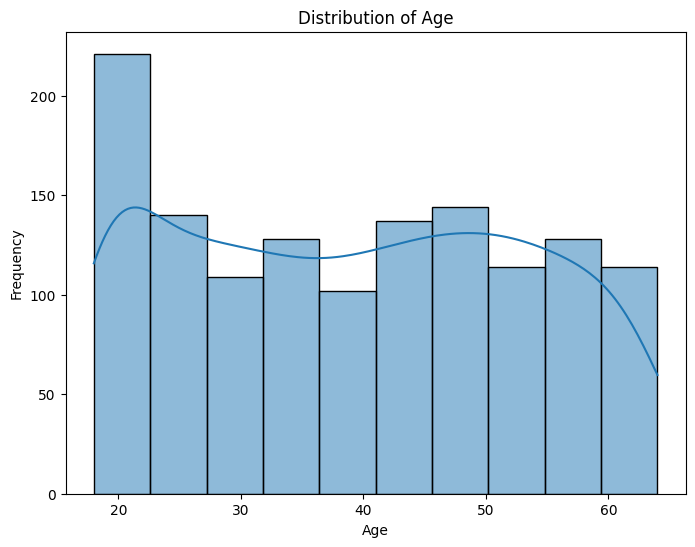

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=10, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


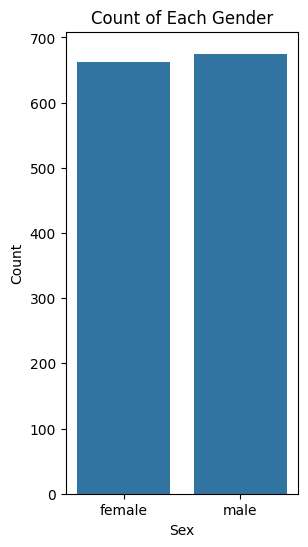

In [ ]:
plt.figure(figsize=(3, 6))
sns.countplot(x='sex', data=df)
plt.title('Count of Each Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


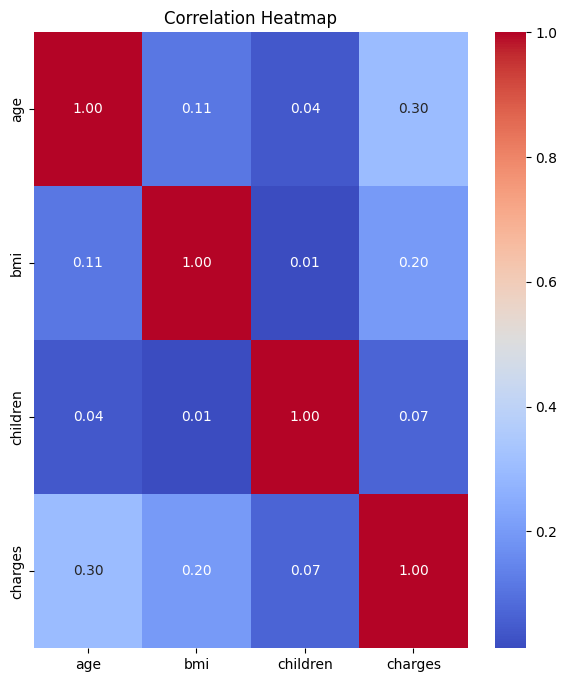

In [ ]:
plt.figure(figsize=(7, 8))
correlation_matrix = df[['age', 'bmi', 'children', 'charges']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


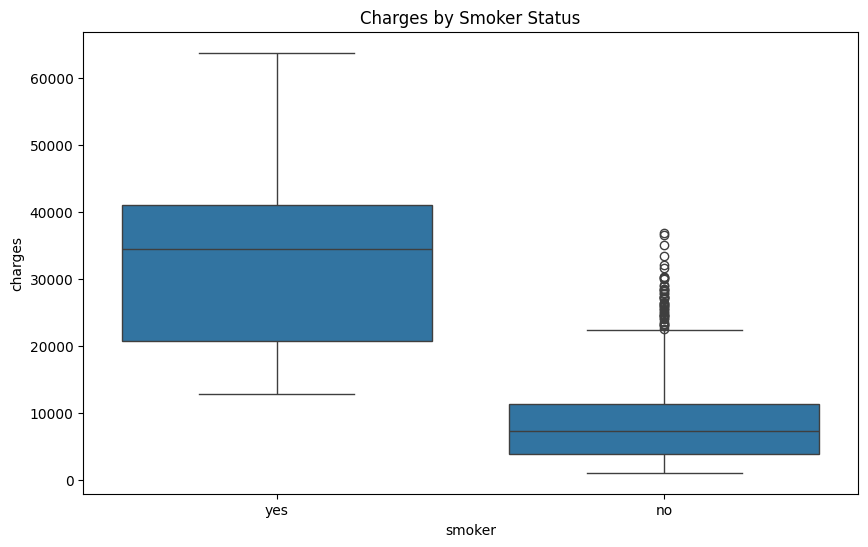

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges by Smoker Status')
plt.show()


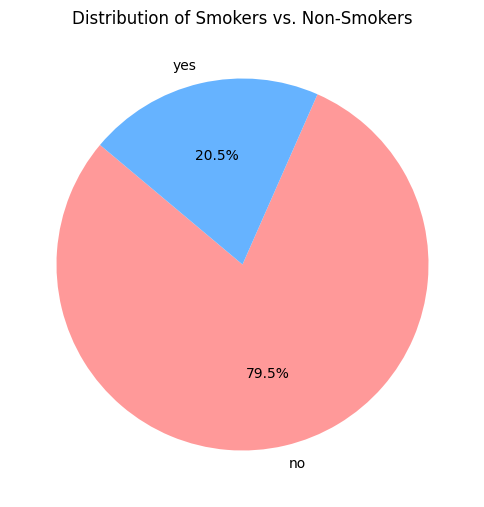

In [ ]:
plt.figure(figsize=(6, 8))
df['smoker'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Smokers vs. Non-Smokers')
plt.ylabel('')
plt.show()


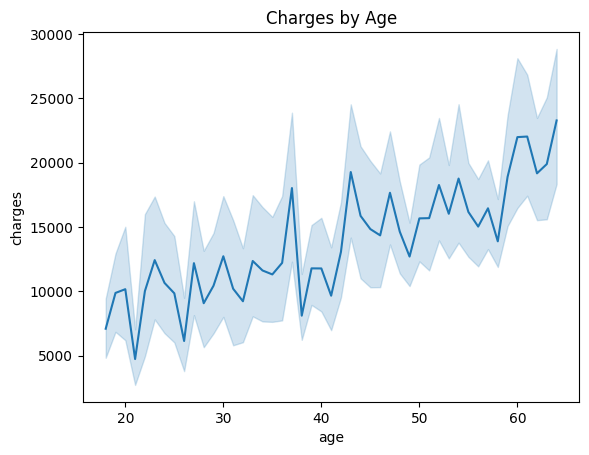

In [ ]:
sns.lineplot(x='age', y='charges', data=df)
plt.title('Charges by Age')
plt.show()


# Splitting the data

In [ ]:
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.20, train_size=0.80,random_state=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.25, train_size=0.75,random_state=1)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.30, train_size=0.70,random_state=1)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.40, train_size=0.60,random_state=1)

# Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

 80-20

In [ ]:
logreg = LogisticRegression(C=1e9)

logreg.fit(X_train1, y_train1)
predictions1 = logreg.predict(X_test1)
print(predictions1)

[1 1 1 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1
 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0
 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1
 0 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0
 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0
 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1
 0 0 0 0 0 1 0 1 1]


In [ ]:
z=confusion_matrix(y_test1, predictions1)
z
accuracy_score(y_test1,predictions1)

0.914179104477612

In [ ]:
print(classification_report(y_test1,predictions1))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       145
           1       0.89      0.93      0.91       123

    accuracy                           0.91       268
   macro avg       0.91      0.92      0.91       268
weighted avg       0.92      0.91      0.91       268



 75-25

In [ ]:
logreg = LogisticRegression(C=1e9)

logreg.fit(X_train2, y_train2)
predictions2 = logreg.predict(X_test2)
print(predictions2)

[1 1 1 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1
 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0
 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1
 0 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0
 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0
 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1
 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1
 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1
 1 1]


In [ ]:
z=confusion_matrix(y_test2, predictions2)
z
accuracy_score(y_test2,predictions2)

0.9164179104477612

In [ ]:
print(classification_report(y_test2,predictions2))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       176
           1       0.91      0.92      0.91       159

    accuracy                           0.92       335
   macro avg       0.92      0.92      0.92       335
weighted avg       0.92      0.92      0.92       335



 70-30

In [ ]:
logreg = LogisticRegression(C=1e9)

logreg.fit(X_train3, y_train3)
predictions3 = logreg.predict(X_test3)
print(predictions3)

[1 1 1 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1
 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0
 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1
 0 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0
 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0
 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1
 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1
 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1
 1 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0
 1 0 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0]


In [ ]:
z=confusion_matrix(y_test3, predictions3)
z
accuracy_score(y_test3,predictions3)

0.917910447761194

In [ ]:
print(classification_report(y_test3,predictions3))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       211
           1       0.90      0.93      0.92       191

    accuracy                           0.92       402
   macro avg       0.92      0.92      0.92       402
weighted avg       0.92      0.92      0.92       402



 60-40

In [ ]:
logreg = LogisticRegression(C=1e9)

logreg.fit(X_train4, y_train4)
predictions4 = logreg.predict(X_test4)
print(predictions4)

[1 1 1 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1
 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0
 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1
 0 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0
 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0
 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1
 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1
 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1
 1 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0
 1 0 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0
 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1
 0 1 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 1 

In [ ]:
z=confusion_matrix(y_test4, predictions4)
z
accuracy_score(y_test4,predictions4)

0.908411214953271

In [ ]:
print(classification_report(y_test4,predictions4))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       281
           1       0.89      0.92      0.90       254

    accuracy                           0.91       535
   macro avg       0.91      0.91      0.91       535
weighted avg       0.91      0.91      0.91       535



#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model=KNeighborsClassifier(n_neighbors=5)

80-20

In [ ]:
model.fit(X_train1, y_train1)

KNeighborsClassifier()

In [ ]:
y_pred1 = model.predict(X_test1)
y_pred1

array([0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1])

In [ ]:
knn1 = pd.DataFrame({'Predicted':y_pred1,'Actual':y_test1})
knn1

,Predicted,Actual
629,0,1
1087,1,1
283,1,1
790,0,0
594,0,0
...,...,...
1164,0,0
962,1,1
1158,0,0
1241,1,1


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test1,y_pred1)

0.8656716417910447

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test1,y_pred1)
cm

array([[138,   7],
       [ 29,  94]])

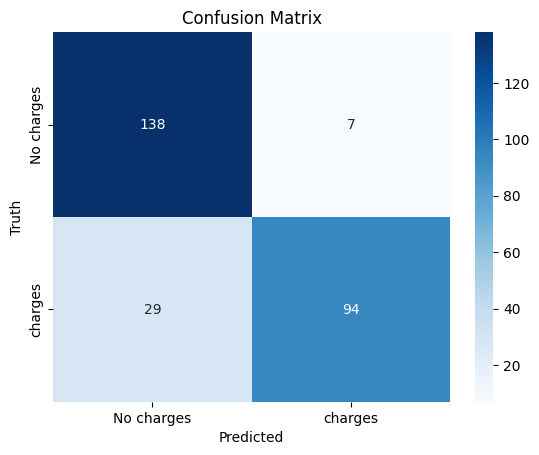

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No charges", "charges"], yticklabels=["No charges", "charges"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test1, y_pred1)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.83      0.95      0.88       145
           1       0.93      0.76      0.84       123

    accuracy                           0.87       268
   macro avg       0.88      0.86      0.86       268
weighted avg       0.87      0.87      0.86       268



75-25

In [ ]:
model.fit(X_train2, y_train2)

KNeighborsClassifier()

In [ ]:
y_pred2 = model.predict(X_test2)
y_pred2

array([0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

In [ ]:
knn2 = pd.DataFrame({'Predicted':y_pred2,'Actual':y_test2})
knn2

,Predicted,Actual
629,0,1
1087,1,1
283,1,1
790,0,0
594,0,0
...,...,...
954,1,1
1038,0,0
1264,1,1
375,0,1


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test2,y_pred2)

0.8507462686567164

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test2,y_pred2)
cm

array([[168,   8],
       [ 42, 117]])

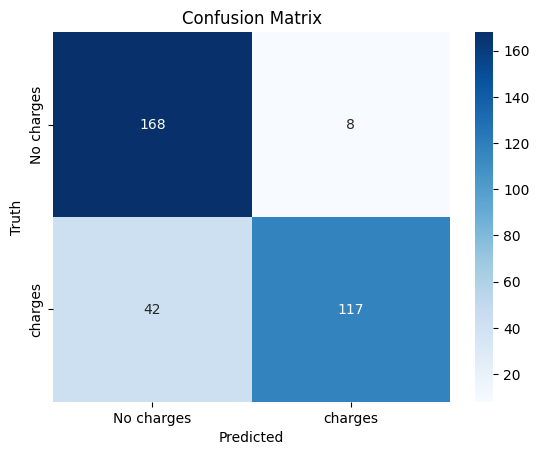

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No charges", "charges"], yticklabels=["No charges", "charges"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep2 = classification_report(y_test2, y_pred2)
print(classification_rep2)

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       176
           1       0.94      0.74      0.82       159

    accuracy                           0.85       335
   macro avg       0.87      0.85      0.85       335
weighted avg       0.86      0.85      0.85       335



70-30

In [ ]:
model.fit(X_train3, y_train3)

KNeighborsClassifier()

In [ ]:
y_pred3 = model.predict(X_test3)
y_pred3

array([0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

In [ ]:
knn3 = pd.DataFrame({'Predicted':y_pred3,'Actual':y_test3})
knn3

,Predicted,Actual
629,0,1
1087,1,1
283,1,1
790,0,0
594,0,0
...,...,...
924,1,0
873,1,0
731,1,1
363,0,0


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test3,y_pred3)

0.8258706467661692

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test3,y_pred3)
cm

array([[196,  15],
       [ 55, 136]])

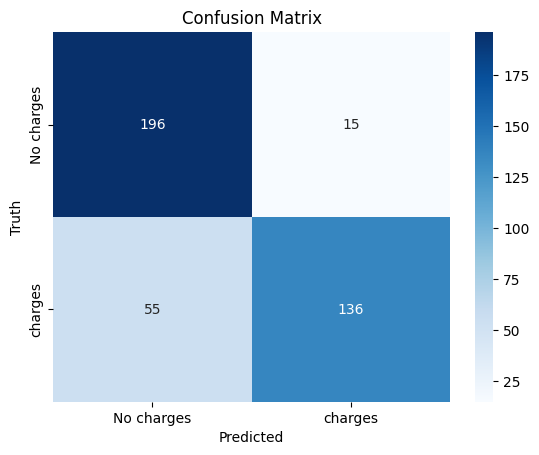

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No charges", "charges"], yticklabels=["No charges", "charges"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep3 = classification_report(y_test3, y_pred3)
print(classification_rep3)

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       211
           1       0.90      0.71      0.80       191

    accuracy                           0.83       402
   macro avg       0.84      0.82      0.82       402
weighted avg       0.84      0.83      0.82       402



60-40

In [ ]:
model.fit(X_train4, y_train4)

KNeighborsClassifier()

In [ ]:
y_pred4 = model.predict(X_test4)
y_pred4

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

In [ ]:
knn4 = pd.DataFrame({'Predicted':y_pred4,'Actual':y_test4})
knn4

,Predicted,Actual
629,0,1
1087,1,1
283,1,1
790,0,0
594,0,0
...,...,...
479,0,0
538,0,0
117,0,1
5,0,0


In [ ]:
# Convert probabilities to binary predictions
y_pred4 = (y_pred4 >= 0.5).astype(int)  # For a threshold of 0.5

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test4,y_pred4)

0.8149532710280374

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test4,y_pred4)
cm

array([[258,  23],
       [ 76, 178]])

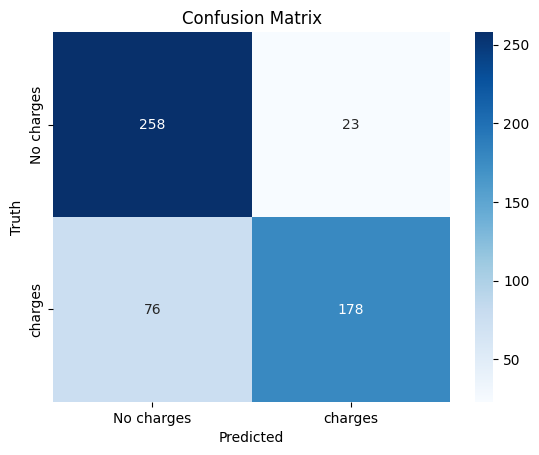

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No charges", "charges"], yticklabels=["No charges", "charges"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep4 = classification_report(y_test4, y_pred4)
print(classification_rep4)

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       281
           1       0.89      0.70      0.78       254

    accuracy                           0.81       535
   macro avg       0.83      0.81      0.81       535
weighted avg       0.83      0.81      0.81       535



#Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.tree import plot_tree

80-20

In [ ]:
# Create Decision Tree classifer object
clf1 = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf1 = clf1.fit(X_train1,y_train1)

In [ ]:
DecisionTreeClassifier?

In [ ]:
#Predict the response for test dataset
y_pred1 = clf1.predict(X_test1)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.8880597014925373


In [ ]:
# Create Decision Tree classifer object
clf1 = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf1 = clf1.fit(X_train1,y_train1)

#Predict the response for test dataset
y_pred1 = clf1.predict(X_test1)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))


Accuracy: 0.8992537313432836


In [ ]:
# Create Decision Tree classifer object
clf1 = DecisionTreeClassifier(criterion="gini", max_depth=2)

# Train Decision Tree Classifer
clf1 = clf1.fit(X_train1,y_train1)

#Predict the response for test dataset
y_pred1 = clf1.predict(X_test1)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.9291044776119403


In [ ]:
# Create Decision Tree classifer object
clf1 = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf1 = clf1.fit(X_train1,y_train1)

#Predict the response for test dataset
y_pred1 = clf1.predict(X_test1)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))


Accuracy: 0.9291044776119403


In [ ]:
# Create Decision Tree classifer object
clf1 = DecisionTreeClassifier(criterion="gini", max_depth=6)

# Train Decision Tree Classifer
clf1 = clf1.fit(X_train1,y_train1)

#Predict the response for test dataset
y_pred1 = clf1.predict(X_test1)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.917910447761194


In [ ]:
# Create Decision Tree classifer object
clf1 = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf1 = clf1.fit(X_train1,y_train1)

#Predict the response for test dataset
y_pred1 = clf1.predict(X_test1)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.9291044776119403


In [ ]:
#Predict the response for train dataset
y_pred1_train1 = clf1.predict(X_train1)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train1, y_pred1_train1))

Accuracy: 0.9167446211412535


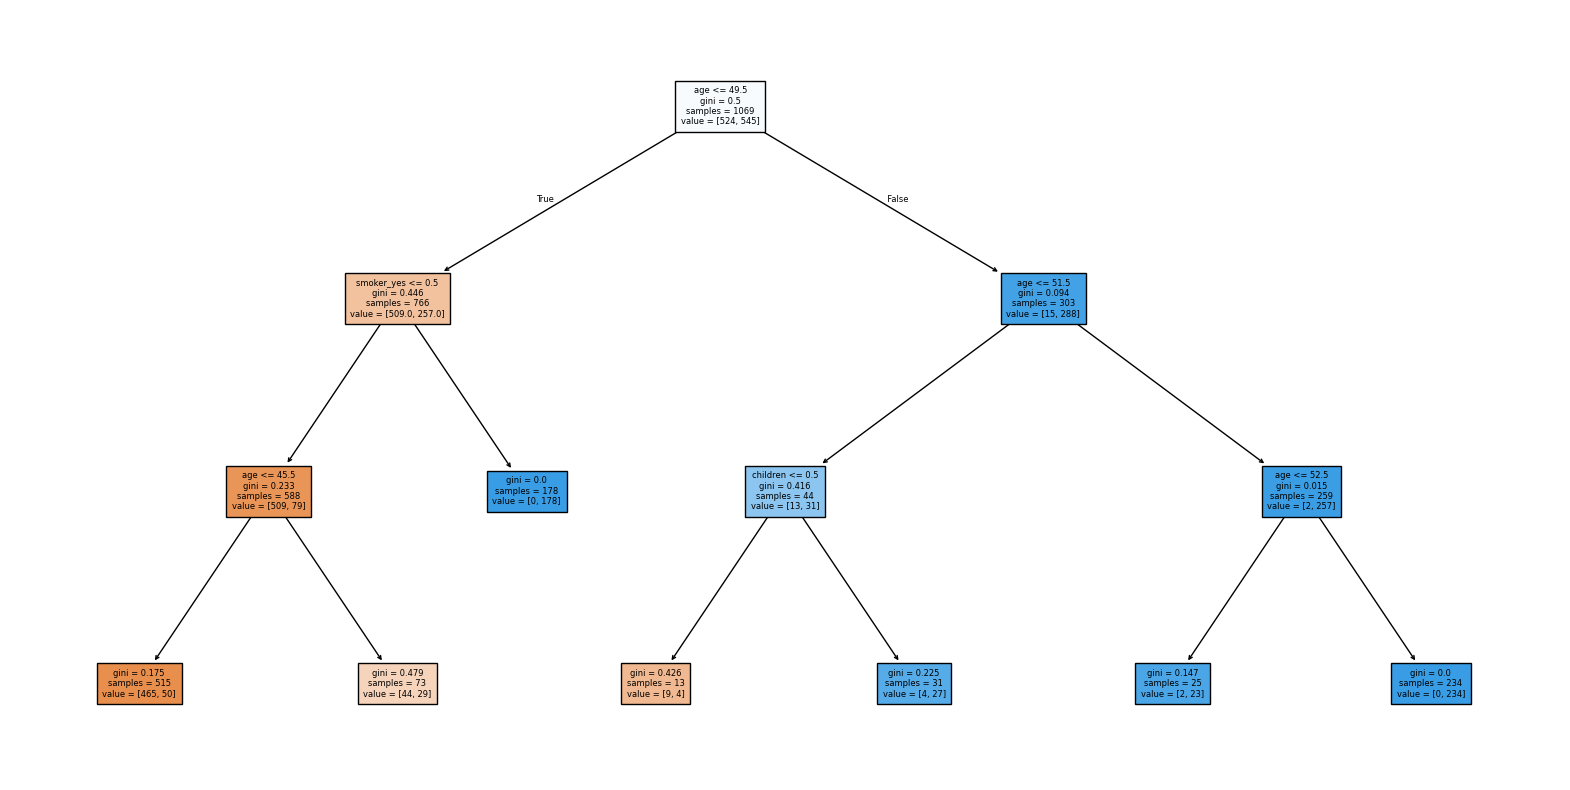

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(clf1,
          fontsize=6,
          feature_names=['age', 'bmi', 'children', 'sex_male', 'smoker_yes',
                         'region_northwest', 'region_southeast', 'region_southwest'],
          filled=True)  # 'filled' to show colors based on values

plt.savefig('out.pdf')

75-25

In [ ]:
# Create Decision Tree classifer object
clf2 = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf2 = clf2.fit(X_train2,y_train2)

In [ ]:
DecisionTreeClassifier?

In [ ]:
#Predict the response for test dataset
y_pred2 = clf2.predict(X_test2)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.8835820895522388


In [ ]:
# Create Decision Tree classifer object
clf2 = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf2 = clf2.fit(X_train2,y_train2)

#Predict the response for test dataset
y_pred2 = clf2.predict(X_test2)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.8955223880597015


In [ ]:
# Create Decision Tree classifer object
clf2 = DecisionTreeClassifier(criterion="gini", max_depth=2)

# Train Decision Tree Classifer
clf2 = clf2.fit(X_train2,y_train2)

#Predict the response for test dataset
y_pred2 = clf2.predict(X_test2)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.9194029850746268


In [ ]:
# Create Decision Tree classifer object
clf2 = DecisionTreeClassifier(criterion="gini", max_depth=6)

# Train Decision Tree Classifer
clf2 = clf2.fit(X_train2,y_train2)

#Predict the response for test dataset
y_pred2 = clf2.predict(X_test2)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.9343283582089552


In [ ]:
# Create Decision Tree classifer object
clf2 = DecisionTreeClassifier(criterion="gini", max_depth=6)

# Train Decision Tree Classifer
clf2 = clf2.fit(X_train2,y_train2)

#Predict the response for test dataset
y_pred2 = clf2.predict(X_test2)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.9343283582089552


In [ ]:
# Create Decision Tree classifer object
clf2 = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf2 = clf2.fit(X_train2,y_train2)

#Predict the response for test dataset
y_pred2 = clf2.predict(X_test2)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.9194029850746268


In [ ]:
#Predict the response for train dataset
y_pred_train2 = clf2.predict(X_train2)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train2, y_pred_train2))

Accuracy: 0.9191616766467066


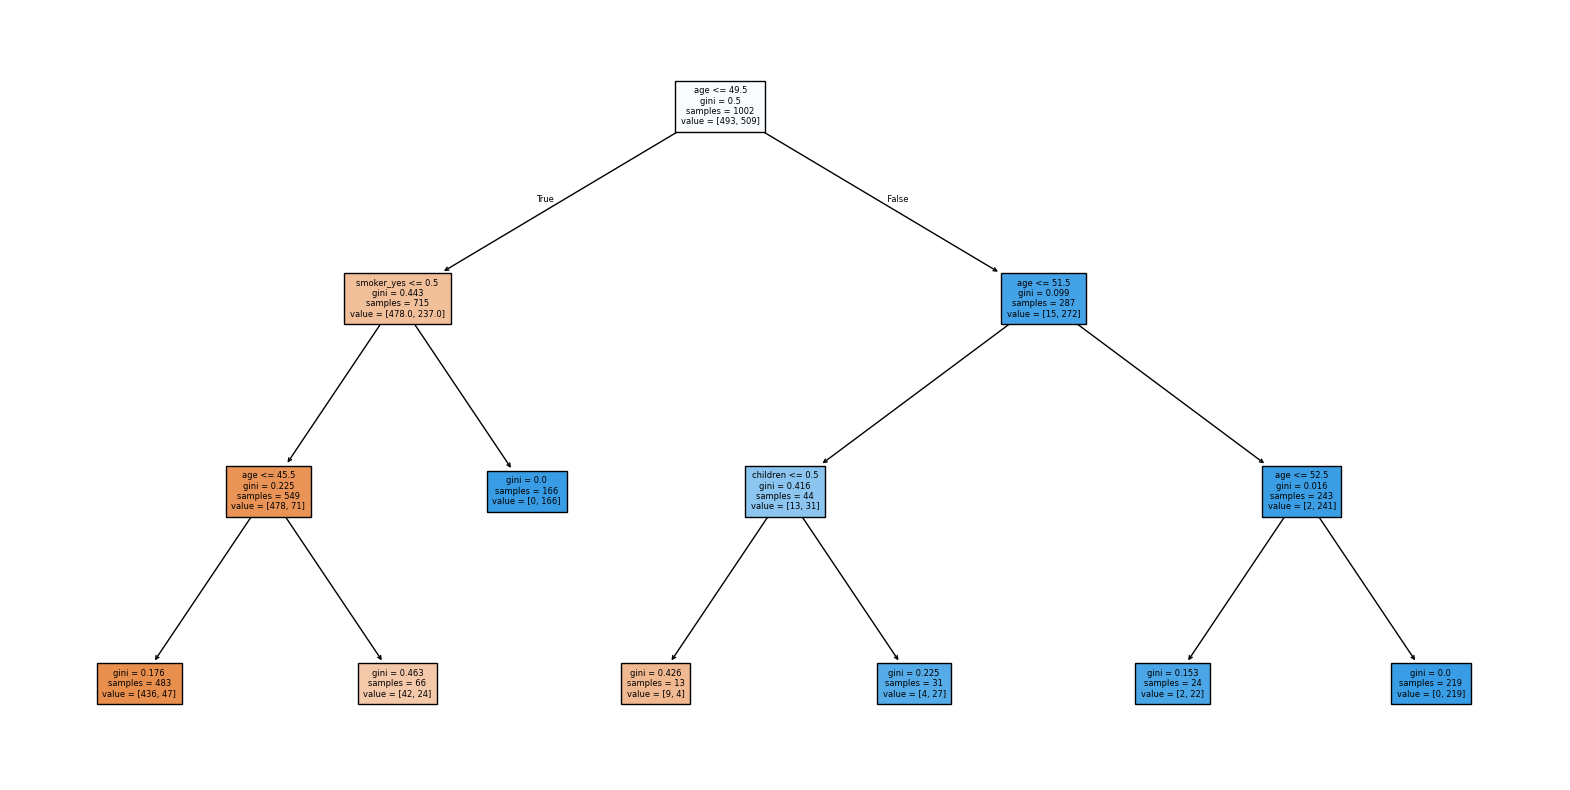

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(clf2,
          fontsize=6,
          feature_names=['age', 'bmi', 'children', 'sex_male', 'smoker_yes',
                         'region_northwest', 'region_southeast', 'region_southwest'],
          filled=True)  # 'filled' to show colors based on values

plt.savefig('out.pdf')

70-30

In [ ]:
# Create Decision Tree classifer object
clf3 = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf3 = clf3.fit(X_train3,y_train3)

In [ ]:
DecisionTreeClassifier?

In [ ]:
#Predict the response for test dataset
y_pred3 = clf3.predict(X_test3)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test3, y_pred3))

Accuracy: 0.9029850746268657


In [ ]:
# Create Decision Tree classifer object
clf3 = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf3 = clf3.fit(X_train3,y_train3)

#Predict the response for test dataset
y_pred3 = clf3.predict(X_test3)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test3, y_pred3))

Accuracy: 0.9054726368159204


In [ ]:
# Create Decision Tree classifer object
clf3 = DecisionTreeClassifier(criterion="gini", max_depth=2)

# Train Decision Tree Classifer
clf3 = clf3.fit(X_train3,y_train3)

#Predict the response for test dataset
y_pred3 = clf3.predict(X_test3)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test3, y_pred3))

Accuracy: 0.9253731343283582


In [ ]:
# Create Decision Tree classifer object
clf3 = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf3 = clf3.fit(X_train3,y_train3)

#Predict the response for test dataset
y_pred3 = clf3.predict(X_test3)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test3, y_pred3))

Accuracy: 0.9253731343283582


In [ ]:
# Create Decision Tree classifer object
clf3 = DecisionTreeClassifier(criterion="gini", max_depth=6)

# Train Decision Tree Classifer
clf3 = clf3.fit(X_train3,y_train3)

#Predict the response for test dataset
y_pred3 = clf3.predict(X_test3)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test3, y_pred3))

Accuracy: 0.9378109452736318


In [ ]:
# Create Decision Tree classifer object
clf3 = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf3 = clf3.fit(X_train3,y_train3)

#Predict the response for test dataset
y_pred3 = clf3.predict(X_test3)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test3, y_pred3))

Accuracy: 0.9253731343283582


In [ ]:
#Predict the response for train dataset
y_pred_train3 = clf3.predict(X_train3)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train3, y_pred_train3))

Accuracy: 0.9112299465240642


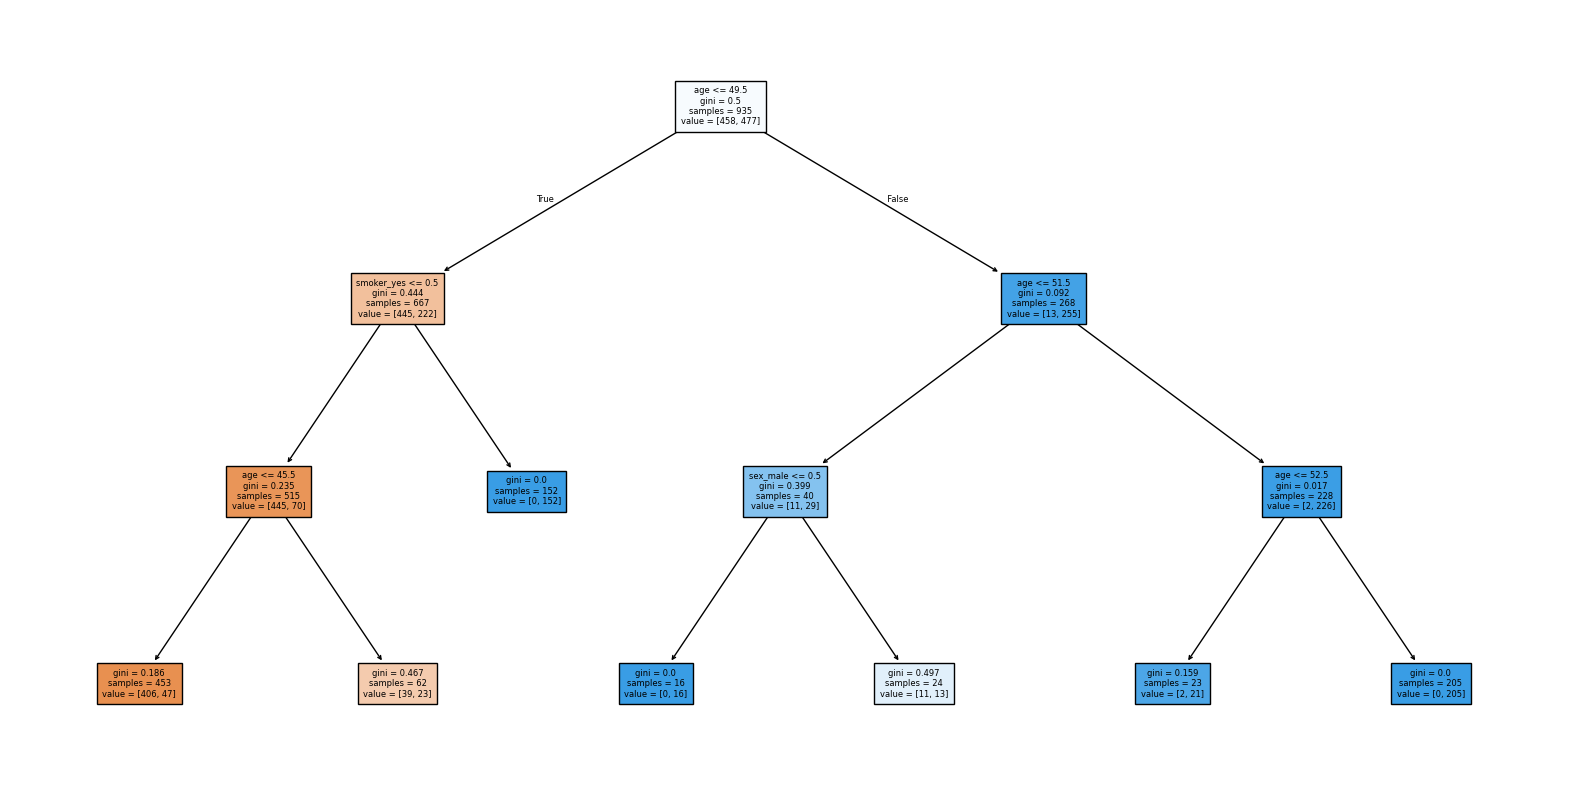

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(clf3,
          fontsize=6,
          feature_names=['age', 'bmi', 'children', 'sex_male', 'smoker_yes',
                         'region_northwest', 'region_southeast', 'region_southwest'],
          filled=True)  # 'filled' to show colors based on values

plt.savefig('out.pdf')

60-40

In [ ]:
# Create Decision Tree classifer object
clf4 = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf4 = clf4.fit(X_train4,y_train4)

In [ ]:
DecisionTreeClassifier?

In [ ]:
#Predict the response for test dataset
y_pred4 = clf4.predict(X_test4)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test4, y_pred4))

Accuracy: 0.8841121495327103


In [ ]:
# Create Decision Tree classifer object
clf4 = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf4 = clf4.fit(X_train4,y_train4)

#Predict the response for test dataset
y_pred4 = clf4.predict(X_test4)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test4, y_pred4))

Accuracy: 0.9158878504672897


In [ ]:
# Create Decision Tree classifer object
clf4 = DecisionTreeClassifier(criterion="gini", max_depth=2)

# Train Decision Tree Classifer
clf4 = clf4.fit(X_train4,y_train4)

#Predict the response for test dataset
y_pred4 = clf4.predict(X_test4)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test4, y_pred4))

Accuracy: 0.914018691588785


In [ ]:
# Create Decision Tree classifer object
clf4 = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf4 = clf4.fit(X_train4,y_train4)

#Predict the response for test dataset
y_pred4 = clf4.predict(X_test4)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test4, y_pred4))

Accuracy: 0.9158878504672897


In [ ]:
# Create Decision Tree classifer object
clf4 = DecisionTreeClassifier(criterion="gini", max_depth=6)

# Train Decision Tree Classifer
clf4 = clf4.fit(X_train4,y_train4)

#Predict the response for test dataset
y_pred4 = clf4.predict(X_test4)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test4, y_pred4))

Accuracy: 0.9214953271028037


In [ ]:
# Create Decision Tree classifer object
clf4 = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf4 = clf4.fit(X_train4,y_train4)

#Predict the response for test dataset
y_pred4 = clf4.predict(X_test4)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test4, y_pred4))

Accuracy: 0.9158878504672897


In [ ]:
#Predict the response for train dataset
y_pred_train4 = clf4.predict(X_train4)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train4, y_pred_train4))

Accuracy: 0.9214463840399002


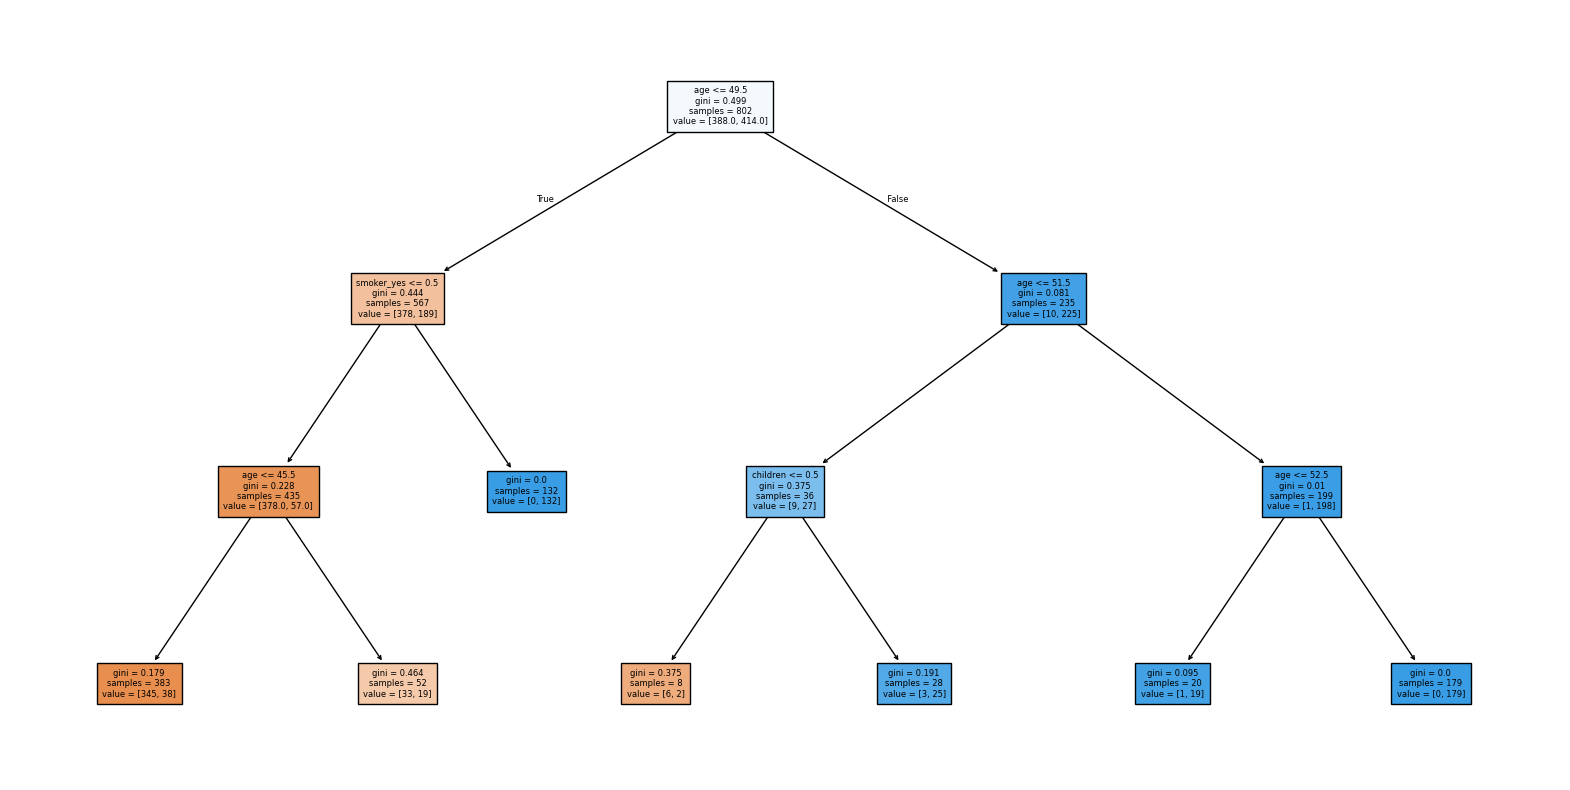

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(clf4,
          fontsize=6,
          feature_names=['age', 'bmi', 'children', 'sex_male', 'smoker_yes',
                         'region_northwest', 'region_southeast', 'region_southwest'],
          filled=True)  # 'filled' to show colors based on values

plt.savefig('out.pdf')

# SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC(kernel='linear')

80-20

In [ ]:
model.fit(X_train1, y_train1)

SVC(kernel='linear')

In [ ]:
y_pred1 = model.predict(X_test1)
y_pred1

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1])

In [ ]:
svm1 = pd.DataFrame({'Predicted':y_pred1,'Actual':y_test1})
svm1

,Predicted,Actual
629,1,1
1087,1,1
283,1,1
790,0,0
594,0,0
...,...,...
1164,0,0
962,1,1
1158,0,0
1241,1,1


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test1,y_pred1)

0.9216417910447762

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test1,y_pred1)
cm

array([[134,  11],
       [ 10, 113]])

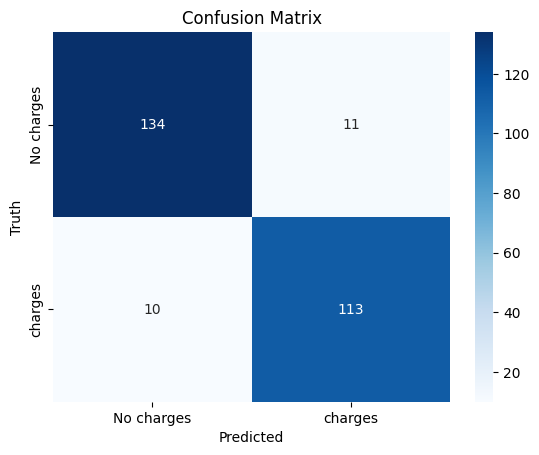

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No charges", "charges"], yticklabels=["No charges", "charges"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep1 = classification_report(y_test1, y_pred1)
print(classification_rep1)

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       145
           1       0.91      0.92      0.91       123

    accuracy                           0.92       268
   macro avg       0.92      0.92      0.92       268
weighted avg       0.92      0.92      0.92       268



75-25

In [ ]:
model.fit(X_train2, y_train2)

SVC(kernel='linear')

In [ ]:
y_pred2 = model.predict(X_test2)
y_pred2

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,

In [ ]:
svm2 = pd.DataFrame({'Predicted':y_pred2,'Actual':y_test2})
svm2

,Predicted,Actual
629,1,1
1087,1,1
283,1,1
790,0,0
594,0,0
...,...,...
954,1,1
1038,0,0
1264,1,1
375,1,1


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test2,y_pred2)

0.9253731343283582

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test2,y_pred2)
cm

array([[164,  12],
       [ 13, 146]])

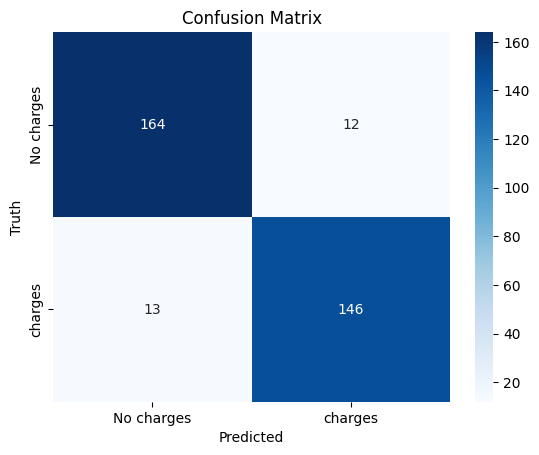

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No charges", "charges"], yticklabels=["No charges", "charges"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep2 = classification_report(y_test2, y_pred2)
print(classification_rep2)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       176
           1       0.92      0.92      0.92       159

    accuracy                           0.93       335
   macro avg       0.93      0.93      0.93       335
weighted avg       0.93      0.93      0.93       335



70-30

In [ ]:
model.fit(X_train3, y_train3)

SVC(kernel='linear')

In [ ]:
y_pred3 = model.predict(X_test3)
y_pred3

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,

In [ ]:
svm3 = pd.DataFrame({'Predicted':y_pred3,'Actual':y_test3})
svm3

,Predicted,Actual
629,1,1
1087,1,1
283,1,1
790,0,0
594,0,0
...,...,...
924,0,0
873,0,0
731,1,1
363,0,0


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test3,y_pred3)

0.927860696517413

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test3,y_pred3)
cm

array([[195,  16],
       [ 13, 178]])

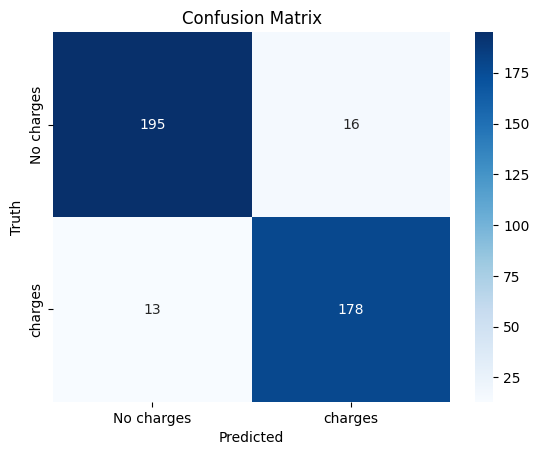

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No charges", "charges"], yticklabels=["No charges", "charges"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep3 = classification_report(y_test3, y_pred3)
print(classification_rep3)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       211
           1       0.92      0.93      0.92       191

    accuracy                           0.93       402
   macro avg       0.93      0.93      0.93       402
weighted avg       0.93      0.93      0.93       402



60-40

In [ ]:
model.fit(X_train4, y_train4)

SVC(kernel='linear')

In [ ]:
y_pred4 = model.predict(X_test4)
y_pred4

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,

In [ ]:
svm4 = pd.DataFrame({'Predicted':y_pred4,'Actual':y_test4})
svm4

,Predicted,Actual
629,1,1
1087,1,1
283,1,1
790,0,0
594,0,0
...,...,...
479,0,0
538,0,0
117,1,1
5,0,0


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test4,y_pred4)

0.9177570093457944

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test4,y_pred4)
cm

array([[258,  23],
       [ 21, 233]])

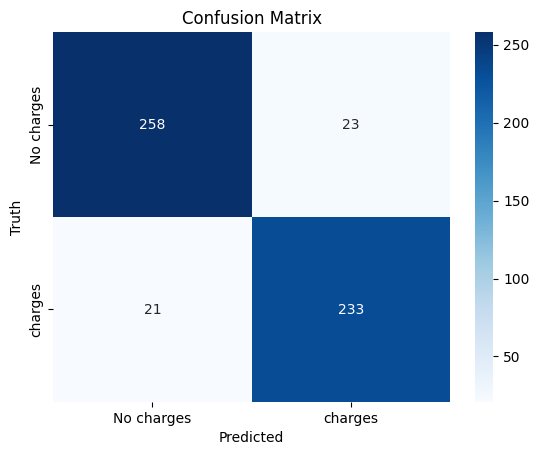

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No charges", "charges"], yticklabels=["No charges", "charges"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep4 = classification_report(y_test4, y_pred4)
print(classification_rep4)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       281
           1       0.91      0.92      0.91       254

    accuracy                           0.92       535
   macro avg       0.92      0.92      0.92       535
weighted avg       0.92      0.92      0.92       535



#Boosting(RandomForest)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

from matplotlib import pyplot as plt

80-20

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train1, y_train1)

RandomForestClassifier()

In [ ]:
y_pred1 = rf.predict(X_test1)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test1, y_pred1, digits=3))
print(confusion_matrix(y_test1, y_pred1))

              precision    recall  f1-score   support

           0      0.913     0.938     0.925       145
           1      0.924     0.894     0.909       123

    accuracy                          0.918       268
   macro avg      0.919     0.916     0.917       268
weighted avg      0.918     0.918     0.918       268

[[136   9]
 [ 13 110]]


75-25

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train2, y_train2)

RandomForestClassifier()

In [ ]:
y_pred2 = rf.predict(X_test2)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test2, y_pred2, digits=3))
print(confusion_matrix(y_test2, y_pred2))

              precision    recall  f1-score   support

           0      0.914     0.966     0.939       176
           1      0.960     0.899     0.929       159

    accuracy                          0.934       335
   macro avg      0.937     0.933     0.934       335
weighted avg      0.936     0.934     0.934       335

[[170   6]
 [ 16 143]]


70-30

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train3, y_train3)

RandomForestClassifier()

In [ ]:
y_pred3 = rf.predict(X_test3)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test3, y_pred3, digits=3))
print(confusion_matrix(y_test3, y_pred3))

              precision    recall  f1-score   support

           0      0.931     0.962     0.946       211
           1      0.957     0.921     0.939       191

    accuracy                          0.943       402
   macro avg      0.944     0.942     0.943       402
weighted avg      0.943     0.943     0.943       402

[[203   8]
 [ 15 176]]


60-40

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train4, y_train4)

RandomForestClassifier()

In [ ]:
y_pred4 = rf.predict(X_test4)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test4, y_pred4, digits=3))
print(confusion_matrix(y_test4, y_pred4))

              precision    recall  f1-score   support

           0      0.912     0.957     0.934       281
           1      0.950     0.898     0.923       254

    accuracy                          0.929       535
   macro avg      0.931     0.927     0.929       535
weighted avg      0.930     0.929     0.929       535

[[269  12]
 [ 26 228]]


#XG Boost

In [ ]:
import xgboost as xgb

#Train the XGboost Model for Classification
model1 = xgb.XGBClassifier()
model2 = xgb.XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)
model3 = xgb.XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.2, subsample=0.5)

80-20

In [ ]:
train_model1 = model1.fit(X_train1, y_train1)
train_model2 = model2.fit(X_train1, y_train1)

In [ ]:
#prediction and Classification Report
from sklearn.metrics import classification_report

pred1 = train_model1.predict(X_test1)
pred2 = train_model2.predict(X_test1)

print('Model 1 XGboost Report %r' % (classification_report(y_test1, pred1)))
print('Model 2 XGboost Report %r' % (classification_report(y_test1, pred2)))

Model 1 XGboost Report '              precision    recall  f1-score   support\n\n           0       0.93      0.96      0.94       145\n           1       0.95      0.91      0.93       123\n\n    accuracy                           0.94       268\n   macro avg       0.94      0.93      0.94       268\nweighted avg       0.94      0.94      0.94       268\n'
Model 2 XGboost Report '              precision    recall  f1-score   support\n\n           0       0.92      0.99      0.95       145\n           1       0.98      0.90      0.94       123\n\n    accuracy                           0.95       268\n   macro avg       0.95      0.94      0.95       268\nweighted avg       0.95      0.95      0.95       268\n'


In [ ]:
#Let's use accuracy score
from sklearn.metrics import accuracy_score

print("Accuracy for model 1: %.5f" % (accuracy_score(y_test1, pred1) ))
print("Accuracy for model 2: %.5f" % (accuracy_score(y_test1, pred2) ))

Accuracy for model 1: 0.93657
Accuracy for model 2: 0.94776


In [ ]:
train_model3 = model3.fit(X_train1, y_train1)
pred3 = train_model3.predict(X_test1)
print("Accuracy for model 3: %.2f" % (accuracy_score(y_test1, pred3) * 100))

Accuracy for model 3: 94.40


In [ ]:
xgb2 = xgb.XGBClassifier(
 learning_rate =0.7,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

train_model7 = xgb2.fit(X_train1, y_train1)
pred7 = train_model7.predict(X_test1)
print("Accuracy for model 7: %.2f" % (accuracy_score(y_test1, pred7) * 100))

Accuracy for model 7: 91.42


In [ ]:
#Let's train a fast RandomForest on the dataset
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_train1, y_train1)
pred8 = rfc_model.predict(X_test1)
print("Accuracy for Random Forest Model: %.2f" % (accuracy_score(y_test1, pred8) * 100))

Accuracy for Random Forest Model: 93.28


75-25

In [ ]:
train_model1 = model1.fit(X_train2, y_train2)
train_model2 = model2.fit(X_train2, y_train2)

In [ ]:
#prediction and Classification Report
from sklearn.metrics import classification_report

pred1 = train_model1.predict(X_test2)
pred2 = train_model2.predict(X_test2)
pred3 = train_model3.predict(X_test2)

print('Model 1 XGboost Report %r' % (classification_report(y_test2, pred1)))
print('Model 2 XGboost Report %r' % (classification_report(y_test2, pred2)))

Model 1 XGboost Report '              precision    recall  f1-score   support\n\n           0       0.91      0.94      0.92       176\n           1       0.93      0.90      0.91       159\n\n    accuracy                           0.92       335\n   macro avg       0.92      0.92      0.92       335\nweighted avg       0.92      0.92      0.92       335\n'
Model 2 XGboost Report '              precision    recall  f1-score   support\n\n           0       0.92      0.99      0.95       176\n           1       0.99      0.91      0.94       159\n\n    accuracy                           0.95       335\n   macro avg       0.95      0.95      0.95       335\nweighted avg       0.95      0.95      0.95       335\n'


In [ ]:
#Let's use accuracy score
from sklearn.metrics import accuracy_score

print("Accuracy for model 1: %.2f" % (accuracy_score(y_test2, pred1) * 100))
print("Accuracy for model 2: %.2f" % (accuracy_score(y_test2, pred2) * 100))

Accuracy for model 1: 91.94
Accuracy for model 2: 94.93


In [ ]:
train_model3 = model3.fit(X_train2, y_train2)
pred3 = train_model3.predict(X_test2)
print("Accuracy for model 3: %.2f" % (accuracy_score(y_test2, pred3) * 100))

Accuracy for model 3: 94.03


In [ ]:
xgb2 = xgb.XGBClassifier(
 learning_rate =0.7,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

train_model7 = xgb2.fit(X_train2, y_train2)
pred7 = train_model7.predict(X_test2)
print("Accuracy for model 7: %.2f" % (accuracy_score(y_test2, pred7) * 100))

Accuracy for model 7: 90.45


In [ ]:
#Let's train a fast RandomForest on the dataset
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_train2, y_train2)
pred8 = rfc_model.predict(X_test2)
print("Accuracy for Random Forest Model: %.2f" % (accuracy_score(y_test2, pred8) * 100))

Accuracy for Random Forest Model: 92.84


70-30

In [ ]:
train_model1 = model1.fit(X_train3, y_train3)
train_model2 = model2.fit(X_train3, y_train3)

In [ ]:
#prediction and Classification Report
from sklearn.metrics import classification_report

pred1 = train_model1.predict(X_test3)
pred2 = train_model2.predict(X_test3)
pred3 = train_model3.predict(X_test3)

print('Model 1 XGboost Report %r' % (classification_report(y_test3, pred1)))
print('Model 2 XGboost Report %r' % (classification_report(y_test3, pred2)))

Model 1 XGboost Report '              precision    recall  f1-score   support\n\n           0       0.93      0.94      0.94       211\n           1       0.94      0.92      0.93       191\n\n    accuracy                           0.93       402\n   macro avg       0.93      0.93      0.93       402\nweighted avg       0.93      0.93      0.93       402\n'
Model 2 XGboost Report '              precision    recall  f1-score   support\n\n           0       0.93      0.97      0.95       211\n           1       0.97      0.92      0.94       191\n\n    accuracy                           0.95       402\n   macro avg       0.95      0.95      0.95       402\nweighted avg       0.95      0.95      0.95       402\n'


In [ ]:
#Let's use accuracy score
from sklearn.metrics import accuracy_score

print("Accuracy for model 1: %.2f" % (accuracy_score(y_test3, pred1) * 100))
print("Accuracy for model 2: %.2f" % (accuracy_score(y_test3, pred2) * 100))

Accuracy for model 1: 93.28
Accuracy for model 2: 94.78


In [ ]:
train_model3 = model3.fit(X_train3, y_train3)
pred3 = train_model3.predict(X_test3)
print("Accuracy for model 3: %.2f" % (accuracy_score(y_test3, pred3) * 100))

Accuracy for model 3: 95.52


In [ ]:
xgb2 = xgb.XGBClassifier(
 learning_rate =0.7,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

train_model7 = xgb2.fit(X_train3, y_train3)
pred7 = train_model7.predict(X_test3)
print("Accuracy for model 7: %.2f" % (accuracy_score(y_test3, pred7) * 100))

Accuracy for model 7: 92.79


In [ ]:
#Let's train a fast RandomForest on the dataset
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_train3, y_train3)
pred8 = rfc_model.predict(X_test3)
print("Accuracy for Random Forest Model: %.2f" % (accuracy_score(y_test3, pred8) * 100))

Accuracy for Random Forest Model: 93.78


60-40

In [ ]:
train_model1 = model1.fit(X_train4, y_train4)
train_model2 = model2.fit(X_train4, y_train4)

In [ ]:
#prediction and Classification Report
from sklearn.metrics import classification_report

pred1 = train_model1.predict(X_test4)
pred2 = train_model2.predict(X_test4)
pred3 = train_model3.predict(X_test4)

print('Model 1 XGboost Report %r' % (classification_report(y_test4, pred1)))
print('Model 2 XGboost Report %r' % (classification_report(y_test4, pred2)))

Model 1 XGboost Report '              precision    recall  f1-score   support\n\n           0       0.91      0.94      0.93       281\n           1       0.93      0.90      0.92       254\n\n    accuracy                           0.92       535\n   macro avg       0.92      0.92      0.92       535\nweighted avg       0.92      0.92      0.92       535\n'
Model 2 XGboost Report '              precision    recall  f1-score   support\n\n           0       0.92      0.99      0.95       281\n           1       0.98      0.91      0.94       254\n\n    accuracy                           0.95       535\n   macro avg       0.95      0.95      0.95       535\nweighted avg       0.95      0.95      0.95       535\n'


In [ ]:
#Let's use accuracy score
from sklearn.metrics import accuracy_score

print("Accuracy for model 1: %.2f" % (accuracy_score(y_test4, pred1) * 100))
print("Accuracy for model 2: %.2f" % (accuracy_score(y_test4, pred2) * 100))

Accuracy for model 1: 92.34
Accuracy for model 2: 94.95


In [ ]:
train_model3 = model3.fit(X_train4, y_train4)
pred3 = train_model3.predict(X_test4)
print("Accuracy for model 3: %.2f" % (accuracy_score(y_test4, pred3) * 100))

Accuracy for model 3: 93.46


In [ ]:
xgb2 = xgb.XGBClassifier(
 learning_rate =0.7,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

train_model7 = xgb2.fit(X_train4, y_train4)
pred7 = train_model7.predict(X_test4)
print("Accuracy for model 7: %.2f" % (accuracy_score(y_test4, pred7) * 100))

Accuracy for model 7: 90.84


In [ ]:
#Let's train a fast RandomForest on the dataset
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_train4, y_train4)
pred8 = rfc_model.predict(X_test4)
print("Accuracy for Random Forest Model: %.2f" % (accuracy_score(y_test4, pred8) * 100))

Accuracy for Random Forest Model: 93.08


#Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# Initialize base estimator
base_estimator = DecisionTreeClassifier(max_depth=3)  # Shallow trees typically work well with AdaBoost

# Initialize AdaBoost model with the base estimator
adaboost = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, learning_rate=1.0, random_state=42)

80-20

In [ ]:
# Train the model on the training data
adaboost.fit(X_train1, y_train1)

# Predict on the test set
y_pred1 = adaboost.predict(X_test1)

# Calculate accuracy
accuracy = accuracy_score(y_test1, y_pred1)
print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.8917910447761194


75-25

In [ ]:
# Train the model on the training data
adaboost.fit(X_train2, y_train2)

# Predict on the test set
y_pred2 = adaboost.predict(X_test2)

# Calculate accuracy
accuracy = accuracy_score(y_test2, y_pred2)
print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.9104477611940298


70-30

In [ ]:
# Train the model on the training data
adaboost.fit(X_train3, y_train3)

# Predict on the test set
y_pred3 = adaboost.predict(X_test3)

# Calculate accuracy
accuracy = accuracy_score(y_test3, y_pred3)
print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.8955223880597015


60-40

In [ ]:
# Train the model on the training data
adaboost.fit(X_train4, y_train4)

# Predict on the test set
y_pred4 = adaboost.predict(X_test4)

# Calculate accuracy
accuracy = accuracy_score(y_test4, y_pred4)
print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.9177570093457944


#ANN


In [ ]:
import tensorflow as tf

80:20

In [ ]:
tf.random.set_seed(42)

# STEP 1: Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP 2: Compiling the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # Corrected here
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')  # Removed typo 'a=recall'
    ]
)

# STEP 3: Fit the model
history = model.fit(X_train1, y_train1, epochs=200)


Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5959 - loss: 0.7009 - precision: 0.6159 - recall: 0.5949
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6590 - loss: 0.6317 - precision: 0.7174 - recall: 0.6058  
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6917 - loss: 0.6024 - precision: 0.7823 - recall: 0.5699
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6971 - loss: 0.5719 - precision: 0.7773 - recall: 0.5937
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7252 - loss: 0.5762 - precision: 0.8003 - recall: 0.6492
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7230 - loss: 0.5378 - precision: 0.7761 - recall: 0.6600
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8344 - loss: 0.4188 - precision: 0.8384 - recall: 0.8435
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8403 - loss: 0.3705 - precision: 0.8509 - recall: 0.8383 
Epoch 9/200
34/34 ━━━

<Axes: >

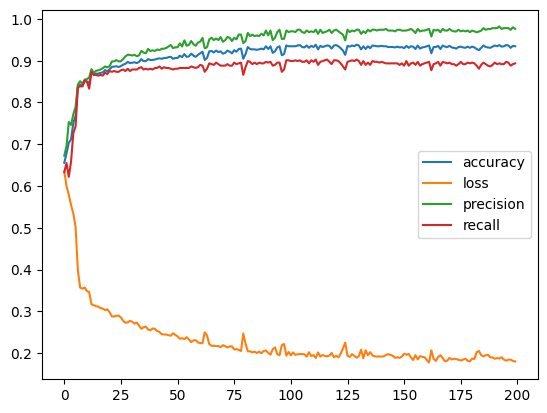

In [ ]:
pd.DataFrame(history.history).plot()

75:25

In [ ]:
tf.random.set_seed(42)

# STEP 1: Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP 2: Compiling the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # Corrected here
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')  # Removed typo 'a=recall'
    ]
)

# STEP 3: Fit the model
history = model.fit(X_train2, y_train2, epochs=200)


Epoch 1/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5159 - loss: 1.8723 - precision: 0.4053 - recall: 0.3458
Epoch 2/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5482 - loss: 0.6564 - precision: 0.5301 - recall: 0.9367 
Epoch 3/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6600 - loss: 0.6114 - precision: 0.6564 - recall: 0.6902
Epoch 4/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6933 - loss: 0.5901 - precision: 0.7280 - recall: 0.6244 
Epoch 5/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6967 - loss: 0.5686 - precision: 0.7399 - recall: 0.6114 
Epoch 6/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7100 - loss: 0.5508 - precision: 0.7547 - recall: 0.6266
Epoch 7/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7121 - loss: 0.5248 - precision: 0.7595 - recall: 0.6248
Epoch 8/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7529 - loss: 0.4844 - precision: 0.7921 - recall: 0.6891
Epoch 9/200
32/32 ━━━

<Axes: >

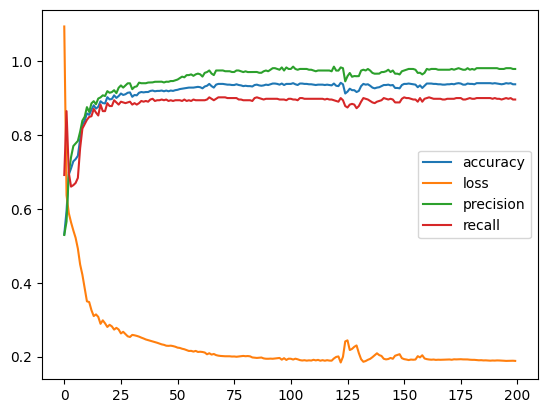

In [ ]:
pd.DataFrame(history.history).plot()

70:30

In [ ]:
tf.random.set_seed(42)

# STEP 1: Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP 2: Compiling the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # Corrected here
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')  # Removed typo 'a=recall'
    ]
)

# STEP 3: Fit the model
history = model.fit(X_train3, y_train3, epochs=200)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6001 - loss: 0.7061 - precision: 0.5896 - recall: 0.6093
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7051 - loss: 0.5770 - precision: 0.7382 - recall: 0.6426 
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7152 - loss: 0.5560 - precision: 0.7585 - recall: 0.6366 
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7434 - loss: 0.5248 - precision: 0.7718 - recall: 0.6943
Epoch 5/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7966 - loss: 0.4765 - precision: 0.8143 - recall: 0.7710 
Epoch 6/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8266 - loss: 0.4392 - precision: 0.8483 - recall: 0.7987 
Epoch 7/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8370 - loss: 0.4072 - precision: 0.8577 - recall: 0.8106 
Epoch 8/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8450 - loss: 0.3904 - precision: 0.8655 - recall: 0.8192
Epoch 9/200
30/30 ━

<Axes: >

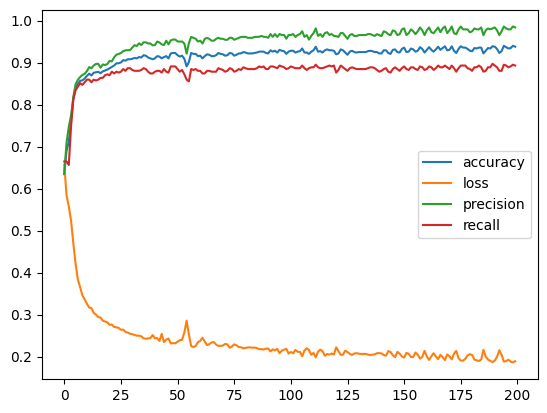

In [ ]:
pd.DataFrame(history.history).plot()

60:40

In [ ]:
tf.random.set_seed(42)

# STEP 1: Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP 2: Compiling the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # Corrected here
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')  # Removed typo 'a=recall'
    ]
)

# STEP 3: Fit the model
history = model.fit(X_train4, y_train4, epochs=200)

Epoch 1/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5674 - loss: 1.3737 - precision: 0.5858 - recall: 0.6491
Epoch 2/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5034 - loss: 0.6724 - precision: 0.2983 - recall: 0.0685         
Epoch 3/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6780 - loss: 0.6551 - precision: 0.7810 - recall: 0.5293 
Epoch 4/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7070 - loss: 0.6371 - precision: 0.7769 - recall: 0.6139 
Epoch 5/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7288 - loss: 0.6196 - precision: 0.7754 - recall: 0.6750 
Epoch 6/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7414 - loss: 0.6001 - precision: 0.7804 - recall: 0.7003 
Epoch 7/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7497 - loss: 0.5792 - precision: 0.7858 - recall: 0.7139 
Epoch 8/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7523 - loss: 0.5559 - precision: 0.7727 - recall: 0.7415 
Epoch 9/2

<Axes: >

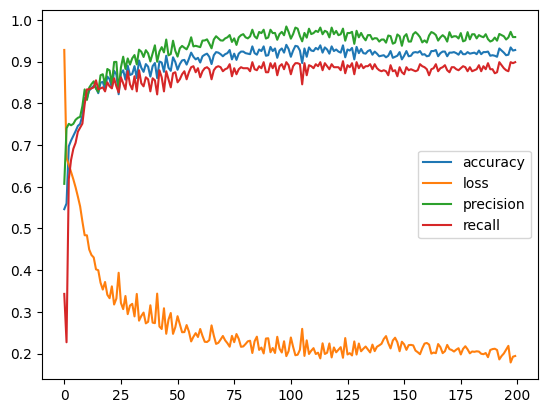

In [ ]:
pd.DataFrame(history.history).plot()

#Multicollinearity

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Split Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i).round(1) for i in range(X.shape[1])]

    return(vif)

calc_vif(X)

,variables,VIF
0,age,7.7
1,bmi,11.4
2,children,1.8
3,sex_male,2.0
4,smoker_yes,1.3
5,region_northwest,1.9
6,region_southeast,2.3
7,region_southwest,2.0


In [ ]:
calc_vif(X.drop('bmi', axis=1))

,variables,VIF
0,age,3.9
1,children,1.8
2,sex_male,1.9
3,smoker_yes,1.2
4,region_northwest,1.7
5,region_southeast,1.8
6,region_southwest,1.7


In [ ]:
calc_vif(X.drop(['bmi','age'], axis=1))

,variables,VIF
0,children,1.6
1,sex_male,1.7
2,smoker_yes,1.2
3,region_northwest,1.3
4,region_southeast,1.4
5,region_southwest,1.3


In [ ]:
import statsmodels.api as sm

model = sm.OLS(y, X).fit()

# Print the summary to get p-values
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:         binary_charges   R-squared (uncentered):                   0.760
Model:                            OLS   Adj. R-squared (uncentered):              0.759
Method:                 Least Squares   F-statistic:                              526.8
Date:                Wed, 18 Dec 2024   Prob (F-statistic):                        0.00
Time:                        15:34:10   Log-Likelihood:                         -478.48
No. Observations:                1337   AIC:                                      973.0
Df Residuals:                    1329   BIC:                                      1015.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [ ]:
X_nomulti = X.drop(['bmi','age'], axis=1)

In [ ]:
X_train1_nomulti, X_test1_nomulti, y_train1_nomulti, y_test1_nomulti = train_test_split(X_nomulti, y, test_size=0.20, train_size=0.80,random_state=1)
X_train2_nomulti, X_test2_nomulti, y_train2_nomulti, y_test2_nomulti = train_test_split(X_nomulti, y, test_size=0.25, train_size=0.75,random_state=1)
X_train3_nomulti, X_test3_nomulti, y_train3_nomulti, y_test3_nomulti = train_test_split(X_nomulti, y, test_size=0.30, train_size=0.70,random_state=1)
X_train4_nomulti, X_test4_nomulti, y_train4_nomulti, y_test4_nomulti = train_test_split(X_nomulti, y, test_size=0.40, train_size=0.60,random_state=1)

80-20

In [ ]:
import statsmodels.api as sm

#X_train1 = sm.add_constant(X_train1_nomulti)
model2 = sm.OLS(y_train1_nomulti, X_train1_nomulti).fit()

# Print the summary to get p-values
print(model2.summary())

                                 OLS Regression Results                                
Dep. Variable:         binary_charges   R-squared (uncentered):                   0.582
Model:                            OLS   Adj. R-squared (uncentered):              0.580
Method:                 Least Squares   F-statistic:                              246.6
Date:                Wed, 18 Dec 2024   Prob (F-statistic):                   2.50e-197
Time:                        15:34:10   Log-Likelihood:                         -690.67
No. Observations:                1069   AIC:                                      1393.
Df Residuals:                    1063   BIC:                                      1423.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

75-25

In [ ]:
import statsmodels.api as sm

#X_train = sm.add_constant(X_train_nomulti)
model2 = sm.OLS(y_train2_nomulti, X_train2_nomulti).fit()

# Print the summary to get p-values
print(model2.summary())

                                 OLS Regression Results                                
Dep. Variable:         binary_charges   R-squared (uncentered):                   0.583
Model:                            OLS   Adj. R-squared (uncentered):              0.581
Method:                 Least Squares   F-statistic:                              232.2
Date:                Wed, 18 Dec 2024   Prob (F-statistic):                   2.32e-185
Time:                        15:34:10   Log-Likelihood:                         -644.03
No. Observations:                1002   AIC:                                      1300.
Df Residuals:                     996   BIC:                                      1330.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

70-30

In [ ]:
import statsmodels.api as sm

#X_train2 = sm.add_constant(X_train3_nomulti)
model2 = sm.OLS(y_train3_nomulti, X_train3_nomulti).fit()

# Print the summary to get p-values
print(model2.summary())

                                 OLS Regression Results                                
Dep. Variable:         binary_charges   R-squared (uncentered):                   0.582
Model:                            OLS   Adj. R-squared (uncentered):              0.580
Method:                 Least Squares   F-statistic:                              215.9
Date:                Wed, 18 Dec 2024   Prob (F-statistic):                   2.56e-172
Time:                        15:34:10   Log-Likelihood:                         -603.82
No. Observations:                 935   AIC:                                      1220.
Df Residuals:                     929   BIC:                                      1249.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

60-40

In [ ]:
import statsmodels.api as sm

#X_train2 = sm.add_constant(X_train4_nomulti)
model2 = sm.OLS(y_train4_nomulti, X_train4_nomulti).fit()

# Print the summary to get p-values
print(model2.summary())

                                 OLS Regression Results                                
Dep. Variable:         binary_charges   R-squared (uncentered):                   0.588
Model:                            OLS   Adj. R-squared (uncentered):              0.585
Method:                 Least Squares   F-statistic:                              189.4
Date:                Wed, 18 Dec 2024   Prob (F-statistic):                   1.40e-149
Time:                        15:34:10   Log-Likelihood:                         -517.20
No. Observations:                 802   AIC:                                      1046.
Df Residuals:                     796   BIC:                                      1075.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

# Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

 80-20

In [ ]:
logreg = LogisticRegression(C=1e9)

logreg.fit(X_train1_nomulti, y_train1_nomulti)
predictions1 = logreg.predict(X_test1_nomulti)
print(predictions1)

[1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0
 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 1 0 0 0 0 0 1 0]


In [ ]:
z=confusion_matrix(y_test1_nomulti, predictions1)
z
accuracy_score(y_test1_nomulti,predictions1)

0.6753731343283582

In [ ]:
print(classification_report(y_test1_nomulti,predictions1))

              precision    recall  f1-score   support

           0       0.63      0.97      0.76       145
           1       0.91      0.33      0.48       123

    accuracy                           0.68       268
   macro avg       0.77      0.65      0.62       268
weighted avg       0.76      0.68      0.63       268



 75-25

In [ ]:
logreg = LogisticRegression(C=1e9)

logreg.fit(X_train2_nomulti, y_train2_nomulti)
predictions2 = logreg.predict(X_test2_nomulti)
print(predictions2)

[1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0
 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0
 1 0]


In [ ]:
z=confusion_matrix(y_test2_nomulti, predictions2)
z
accuracy_score(y_test2_nomulti,predictions2)

0.6776119402985075

In [ ]:
print(classification_report(y_test2_nomulti,predictions2))

              precision    recall  f1-score   support

           0       0.62      0.98      0.76       176
           1       0.93      0.35      0.50       159

    accuracy                           0.68       335
   macro avg       0.78      0.66      0.63       335
weighted avg       0.77      0.68      0.64       335



 70-30

In [ ]:
logreg = LogisticRegression(C=1e9)

logreg.fit(X_train3_nomulti, y_train3_nomulti)
predictions3 = logreg.predict(X_test3_nomulti)
print(predictions3)

[1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0
 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1
 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0]


In [ ]:
z=confusion_matrix(y_test3_nomulti, predictions3)
z
accuracy_score(y_test3_nomulti,predictions3)

0.6890547263681592

In [ ]:
print(classification_report(y_test3_nomulti,predictions3))

              precision    recall  f1-score   support

           0       0.63      0.96      0.76       211
           1       0.90      0.39      0.54       191

    accuracy                           0.69       402
   macro avg       0.77      0.67      0.65       402
weighted avg       0.76      0.69      0.66       402



 60-40

In [ ]:
logreg = LogisticRegression(C=1e9)

logreg.fit(X_train4_nomulti, y_train4_nomulti)
predictions4 = logreg.predict(X_test4_nomulti)
print(predictions4)

[1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0
 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0
 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
z=confusion_matrix(y_test4_nomulti, predictions4)
z
accuracy_score(y_test4_nomulti,predictions4)

0.6934579439252336

In [ ]:
print(classification_report(y_test4_nomulti,predictions4))

              precision    recall  f1-score   support

           0       0.64      0.98      0.77       281
           1       0.94      0.38      0.54       254

    accuracy                           0.69       535
   macro avg       0.79      0.68      0.65       535
weighted avg       0.78      0.69      0.66       535



#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model=KNeighborsClassifier(n_neighbors=5)

80-20

In [ ]:
model.fit(X_train1_nomulti, y_train1_nomulti)

KNeighborsClassifier()

In [ ]:
y_pred1 = model.predict(X_test1_nomulti)
y_pred1

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1])

In [ ]:
knn1 = pd.DataFrame({'Predicted':y_pred1,'Actual':y_test1_nomulti})
knn1

,Predicted,Actual
629,1,1
1087,0,1
283,0,1
790,0,0
594,0,0
...,...,...
1164,0,0
962,1,1
1158,1,0
1241,1,1


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test1_nomulti,y_pred1)

0.6343283582089553

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test1_nomulti,y_pred1)
cm

array([[105,  40],
       [ 58,  65]])

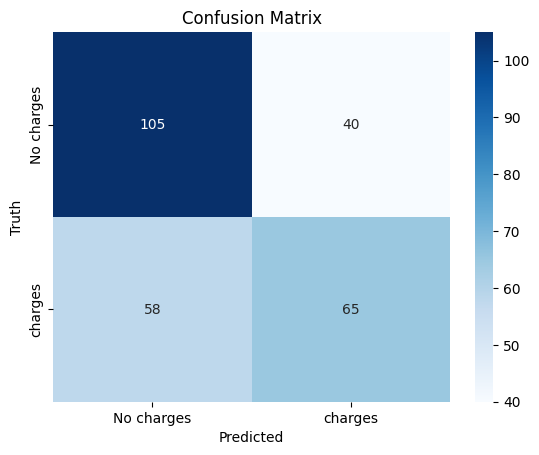

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No charges", "charges"], yticklabels=["No charges", "charges"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test1_nomulti, y_pred1)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.64      0.72      0.68       145
           1       0.62      0.53      0.57       123

    accuracy                           0.63       268
   macro avg       0.63      0.63      0.63       268
weighted avg       0.63      0.63      0.63       268



75-25

In [ ]:
model.fit(X_train2_nomulti, y_train2_nomulti)

KNeighborsClassifier()

In [ ]:
y_pred2 = model.predict(X_test2_nomulti)
y_pred2

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,

In [ ]:
knn2 = pd.DataFrame({'Predicted':y_pred2,'Actual':y_test2_nomulti})
knn2

,Predicted,Actual
629,1,1
1087,0,1
283,0,1
790,0,0
594,0,0
...,...,...
954,1,1
1038,1,0
1264,1,1
375,1,1


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test2_nomulti,y_pred2)

0.6298507462686567

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test2_nomulti,y_pred2)
cm

array([[130,  46],
       [ 78,  81]])

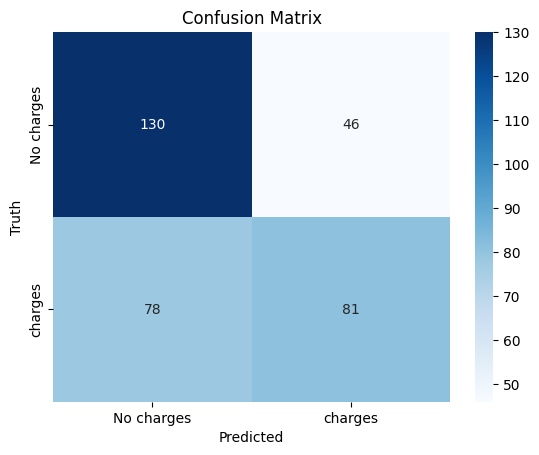

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No charges", "charges"], yticklabels=["No charges", "charges"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep2 = classification_report(y_test2_nomulti, y_pred2)
print(classification_rep2)

              precision    recall  f1-score   support

           0       0.62      0.74      0.68       176
           1       0.64      0.51      0.57       159

    accuracy                           0.63       335
   macro avg       0.63      0.62      0.62       335
weighted avg       0.63      0.63      0.62       335



70-30

In [ ]:
model.fit(X_train3_nomulti, y_train3_nomulti)

KNeighborsClassifier()

In [ ]:
y_pred3 = model.predict(X_test3_nomulti)
y_pred3

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

In [ ]:
knn3 = pd.DataFrame({'Predicted':y_pred3,'Actual':y_test3_nomulti})
knn3

,Predicted,Actual
629,1,1
1087,0,1
283,0,1
790,0,0
594,0,0
...,...,...
924,0,0
873,0,0
731,0,1
363,0,0


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test3_nomulti,y_pred3)

0.6368159203980099

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test3_nomulti,y_pred3)
cm

array([[149,  62],
       [ 84, 107]])

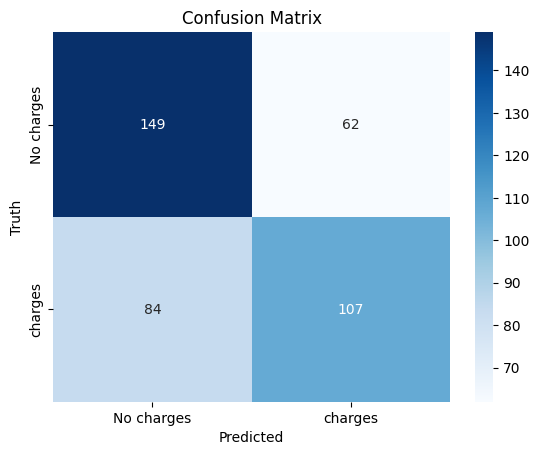

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No charges", "charges"], yticklabels=["No charges", "charges"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep3 = classification_report(y_test3_nomulti, y_pred3)
print(classification_rep3)

              precision    recall  f1-score   support

           0       0.64      0.71      0.67       211
           1       0.63      0.56      0.59       191

    accuracy                           0.64       402
   macro avg       0.64      0.63      0.63       402
weighted avg       0.64      0.64      0.63       402



60-40

In [ ]:
model.fit(X_train4_nomulti, y_train4_nomulti)

KNeighborsClassifier()

In [ ]:
y_pred4 = model.predict(X_test4_nomulti)
y_pred4

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,

In [ ]:
knn4 = pd.DataFrame({'Predicted':y_pred4,'Actual':y_test4_nomulti})
knn4

,Predicted,Actual
629,1,1
1087,0,1
283,1,1
790,0,0
594,0,0
...,...,...
479,0,0
538,0,0
117,1,1
5,0,0


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test4_nomulti,y_pred4)

0.6392523364485981

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test4_nomulti,y_pred4)
cm

array([[200,  81],
       [112, 142]])

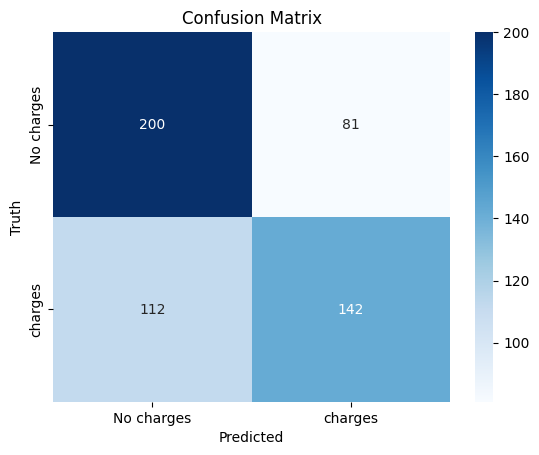

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No charges", "charges"], yticklabels=["No charges", "charges"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep4 = classification_report(y_test4_nomulti, y_pred4)
print(classification_rep4)

              precision    recall  f1-score   support

           0       0.64      0.71      0.67       281
           1       0.64      0.56      0.60       254

    accuracy                           0.64       535
   macro avg       0.64      0.64      0.63       535
weighted avg       0.64      0.64      0.64       535



#Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

80-20

In [ ]:
# Create Decision Tree classifer object
clf1 = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf1 = clf1.fit(X_train1_nomulti,y_train1_nomulti)

In [ ]:
DecisionTreeClassifier?

In [ ]:
#Predict the response for test dataset
y_pred1 = clf1.predict(X_test1_nomulti)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test1_nomulti, y_pred1))

Accuracy: 0.6902985074626866


In [ ]:
# Create Decision Tree classifer object
clf1 = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf1 = clf1.fit(X_train1_nomulti,y_train1_nomulti)

#Predict the response for test dataset
y_pred1 = clf1.predict(X_test1_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test1_nomulti, y_pred1))


Accuracy: 0.6865671641791045


In [ ]:
# Create Decision Tree classifer object
clf1 = DecisionTreeClassifier(criterion="gini", max_depth=2)

# Train Decision Tree Classifer
clf1 = clf1.fit(X_train1_nomulti,y_train1_nomulti)

#Predict the response for test dataset
y_pred1 = clf1.predict(X_test1_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test1_nomulti, y_pred1))

Accuracy: 0.6828358208955224


In [ ]:
# Create Decision Tree classifer object
clf1 = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf1 = clf1.fit(X_train1_nomulti,y_train1_nomulti)

#Predict the response for test dataset
y_pred1 = clf1.predict(X_test1_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test1_nomulti, y_pred1))


Accuracy: 0.6865671641791045


In [ ]:
# Create Decision Tree classifer object
clf1 = DecisionTreeClassifier(criterion="gini", max_depth=6)

# Train Decision Tree Classifer
clf1 = clf1.fit(X_train1_nomulti,y_train1_nomulti)

#Predict the response for test dataset
y_pred1 = clf1.predict(X_test1_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test1_nomulti, y_pred1))

Accuracy: 0.6567164179104478


In [ ]:
# Create Decision Tree classifer object
clf1 = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf1 = clf1.fit(X_train1_nomulti,y_train1_nomulti)

#Predict the response for test dataset
y_pred1 = clf1.predict(X_test1_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test1_nomulti, y_pred1))

Accuracy: 0.6865671641791045


In [ ]:
#Predict the response for train dataset
y_pred1_train1 = clf1.predict(X_train1_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train1_nomulti, y_pred1_train1))

Accuracy: 0.7146866230121609


75-25

In [ ]:
# Create Decision Tree classifer object
clf2 = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf2 = clf2.fit(X_train2_nomulti,y_train2_nomulti)

In [ ]:
DecisionTreeClassifier?

In [ ]:
#Predict the response for test dataset
y_pred2 = clf2.predict(X_test2_nomulti)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test2_nomulti, y_pred2))

Accuracy: 0.6925373134328359


In [ ]:
# Create Decision Tree classifer object
clf2 = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf2 = clf2.fit(X_train2_nomulti,y_train2_nomulti)

#Predict the response for test dataset
y_pred2 = clf2.predict(X_test2_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test2_nomulti, y_pred2))

Accuracy: 0.6895522388059702


In [ ]:
# Create Decision Tree classifer object
clf2 = DecisionTreeClassifier(criterion="gini", max_depth=2)

# Train Decision Tree Classifer
clf2 = clf2.fit(X_train2_nomulti,y_train2_nomulti)

#Predict the response for test dataset
y_pred2 = clf2.predict(X_test2_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test2_nomulti, y_pred2))

Accuracy: 0.6805970149253732


In [ ]:
# Create Decision Tree classifer object
clf2 = DecisionTreeClassifier(criterion="gini", max_depth=6)

# Train Decision Tree Classifer
clf2 = clf2.fit(X_train2_nomulti,y_train2_nomulti)

#Predict the response for test dataset
y_pred2 = clf2.predict(X_test2_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test2_nomulti, y_pred2))

Accuracy: 0.6656716417910448


In [ ]:
# Create Decision Tree classifer object
clf2 = DecisionTreeClassifier(criterion="gini", max_depth=6)

# Train Decision Tree Classifer
clf2 = clf2.fit(X_train2_nomulti,y_train2_nomulti)

#Predict the response for test dataset
y_pred2 = clf2.predict(X_test2_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test2_nomulti, y_pred2))

Accuracy: 0.6656716417910448


In [ ]:
# Create Decision Tree classifer object
clf2 = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf2 = clf2.fit(X_train2_nomulti,y_train2_nomulti)

#Predict the response for test dataset
y_pred2 = clf2.predict(X_test2_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test2_nomulti, y_pred2))

Accuracy: 0.6895522388059702


In [ ]:
#Predict the response for train dataset
y_pred_train2 = clf2.predict(X_train2_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train2_nomulti, y_pred_train2))

Accuracy: 0.7155688622754491


70-30

In [ ]:
# Create Decision Tree classifer object
clf3 = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf3 = clf3.fit(X_train3_nomulti,y_train3_nomulti)

In [ ]:
DecisionTreeClassifier?

In [ ]:
#Predict the response for test dataset
y_pred3 = clf3.predict(X_test3_nomulti)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test3_nomulti, y_pred3))

Accuracy: 0.7089552238805971


In [ ]:
# Create Decision Tree classifer object
clf3 = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf3 = clf3.fit(X_train3_nomulti,y_train3_nomulti)

#Predict the response for test dataset
y_pred3 = clf3.predict(X_test3_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test3_nomulti, y_pred3))

Accuracy: 0.6940298507462687


In [ ]:
# Create Decision Tree classifer object
clf3 = DecisionTreeClassifier(criterion="gini", max_depth=2)

# Train Decision Tree Classifer
clf3 = clf3.fit(X_train3_nomulti,y_train3_nomulti)

#Predict the response for test dataset
y_pred3 = clf3.predict(X_test3_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test3_nomulti, y_pred3))

Accuracy: 0.6940298507462687


In [ ]:
# Create Decision Tree classifer object
clf3 = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf3 = clf3.fit(X_train3_nomulti,y_train3_nomulti)

#Predict the response for test dataset
y_pred3 = clf3.predict(X_test3_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test3_nomulti, y_pred3))

Accuracy: 0.6940298507462687


In [ ]:
# Create Decision Tree classifer object
clf3 = DecisionTreeClassifier(criterion="gini", max_depth=6)

# Train Decision Tree Classifer
clf3 = clf3.fit(X_train3_nomulti,y_train3_nomulti)

#Predict the response for test dataset
y_pred3 = clf3.predict(X_test3_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test3_nomulti, y_pred3))

Accuracy: 0.6840796019900498


In [ ]:
# Create Decision Tree classifer object
clf3 = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf3 = clf3.fit(X_train3_nomulti,y_train3_nomulti)

#Predict the response for test dataset
y_pred3 = clf3.predict(X_test3_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test3_nomulti, y_pred3))

Accuracy: 0.6940298507462687


In [ ]:
#Predict the response for train dataset
y_pred_train3 = clf3.predict(X_train3_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train3_nomulti, y_pred_train3))

Accuracy: 0.7101604278074867


60-40

In [ ]:
# Create Decision Tree classifer object
clf4 = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf4 = clf4.fit(X_train4_nomulti,y_train4_nomulti)

In [ ]:
DecisionTreeClassifier?

In [ ]:
#Predict the response for test dataset
y_pred4 = clf4.predict(X_test4_nomulti)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test4_nomulti, y_pred4))

Accuracy: 0.7009345794392523


In [ ]:
# Create Decision Tree classifer object
clf4 = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf4 = clf4.fit(X_train4_nomulti,y_train4_nomulti)

#Predict the response for test dataset
y_pred4 = clf4.predict(X_test4_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test4_nomulti, y_pred4))

Accuracy: 0.7046728971962617


In [ ]:
# Create Decision Tree classifer object
clf4 = DecisionTreeClassifier(criterion="gini", max_depth=2)

# Train Decision Tree Classifer
clf4 = clf4.fit(X_train4_nomulti,y_train4_nomulti)

#Predict the response for test dataset
y_pred4 = clf4.predict(X_test4_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test4_nomulti, y_pred4))

Accuracy: 0.697196261682243


In [ ]:
# Create Decision Tree classifer object
clf4 = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf4 = clf4.fit(X_train4_nomulti,y_train4_nomulti)

#Predict the response for test dataset
y_pred4 = clf4.predict(X_test4_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test4_nomulti, y_pred4))

Accuracy: 0.7046728971962617


In [ ]:
# Create Decision Tree classifer object
clf4 = DecisionTreeClassifier(criterion="gini", max_depth=6)

# Train Decision Tree Classifer
clf4 = clf4.fit(X_train4_nomulti,y_train4_nomulti)

#Predict the response for test dataset
y_pred4 = clf4.predict(X_test4_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test4_nomulti, y_pred4))

Accuracy: 0.6934579439252336


In [ ]:
# Create Decision Tree classifer object
clf4 = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf4 = clf4.fit(X_train4_nomulti,y_train4_nomulti)

#Predict the response for test dataset
y_pred4 = clf4.predict(X_test4_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test4_nomulti, y_pred4))

Accuracy: 0.7046728971962617


In [ ]:
#Predict the response for train dataset
y_pred_train4 = clf4.predict(X_train4_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train4_nomulti, y_pred_train4))

Accuracy: 0.7119700748129676


# SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC(kernel='linear')

80-20

In [ ]:
model.fit(X_train1_nomulti, y_train1_nomulti)

SVC(kernel='linear')

In [ ]:
y_pred1 = model.predict(X_test1_nomulti)
y_pred1

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0])

In [ ]:
svm1 = pd.DataFrame({'Predicted':y_pred1,'Actual':y_test1_nomulti})
svm1

,Predicted,Actual
629,1,1
1087,0,1
283,0,1
790,0,0
594,0,0
...,...,...
1164,0,0
962,0,1
1158,0,0
1241,1,1


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test1_nomulti,y_pred1)

0.6828358208955224

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test1_nomulti,y_pred1)
cm

array([[145,   0],
       [ 85,  38]])

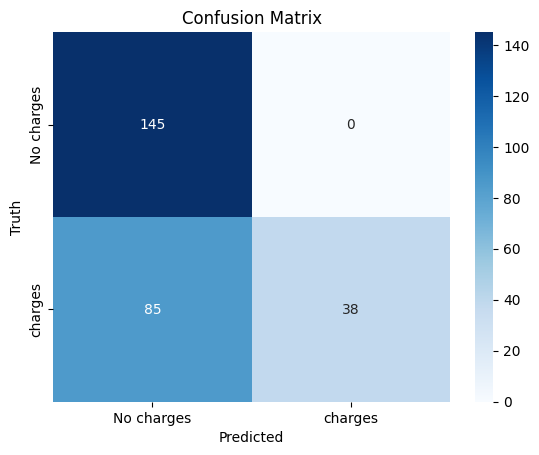

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No charges", "charges"], yticklabels=["No charges", "charges"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep1 = classification_report(y_test1_nomulti, y_pred1)
print(classification_rep1)

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       145
           1       1.00      0.31      0.47       123

    accuracy                           0.68       268
   macro avg       0.82      0.65      0.62       268
weighted avg       0.80      0.68      0.64       268



75-25

In [ ]:
model.fit(X_train2_nomulti, y_train2_nomulti)

SVC(kernel='linear')

In [ ]:
y_pred2 = model.predict(X_test2_nomulti)
y_pred2

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
svm2 = pd.DataFrame({'Predicted':y_pred2,'Actual':y_test2_nomulti})
svm2

,Predicted,Actual
629,1,1
1087,0,1
283,0,1
790,0,0
594,0,0
...,...,...
954,1,1
1038,0,0
1264,0,1
375,1,1


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test2_nomulti,y_pred2)

0.6805970149253732

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test2_nomulti,y_pred2)
cm

array([[176,   0],
       [107,  52]])

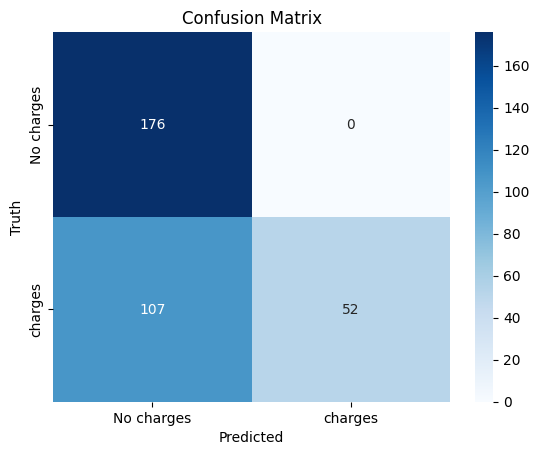

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No charges", "charges"], yticklabels=["No charges", "charges"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep2 = classification_report(y_test2_nomulti, y_pred2)
print(classification_rep2)

              precision    recall  f1-score   support

           0       0.62      1.00      0.77       176
           1       1.00      0.33      0.49       159

    accuracy                           0.68       335
   macro avg       0.81      0.66      0.63       335
weighted avg       0.80      0.68      0.64       335



70-30

In [ ]:
model.fit(X_train3_nomulti, y_train3_nomulti)

SVC(kernel='linear')

In [ ]:
y_pred3 = model.predict(X_test3_nomulti)
y_pred3

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
svm3 = pd.DataFrame({'Predicted':y_pred3,'Actual':y_test3_nomulti})
svm3

,Predicted,Actual
629,1,1
1087,0,1
283,0,1
790,0,0
594,0,0
...,...,...
924,0,0
873,0,0
731,0,1
363,0,0


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test3_nomulti,y_pred3)

0.6940298507462687

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test3_nomulti,y_pred3)
cm

array([[211,   0],
       [123,  68]])

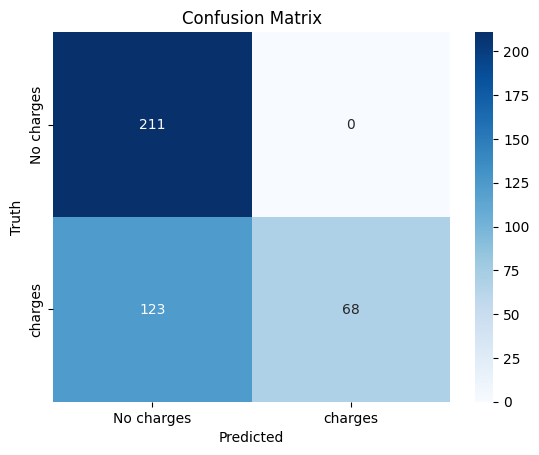

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No charges", "charges"], yticklabels=["No charges", "charges"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep3 = classification_report(y_test3_nomulti, y_pred3)
print(classification_rep3)

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       211
           1       1.00      0.36      0.53       191

    accuracy                           0.69       402
   macro avg       0.82      0.68      0.65       402
weighted avg       0.81      0.69      0.66       402



60-40

In [ ]:
model.fit(X_train4_nomulti, y_train4_nomulti)

SVC(kernel='linear')

In [ ]:
y_pred4 = model.predict(X_test4_nomulti)
y_pred4

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
svm4 = pd.DataFrame({'Predicted':y_pred4,'Actual':y_test4_nomulti})
svm4

,Predicted,Actual
629,1,1
1087,0,1
283,0,1
790,0,0
594,0,0
...,...,...
479,0,0
538,0,0
117,1,1
5,0,0


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test4_nomulti,y_pred4)

0.697196261682243

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test4_nomulti,y_pred4)
cm

array([[281,   0],
       [162,  92]])

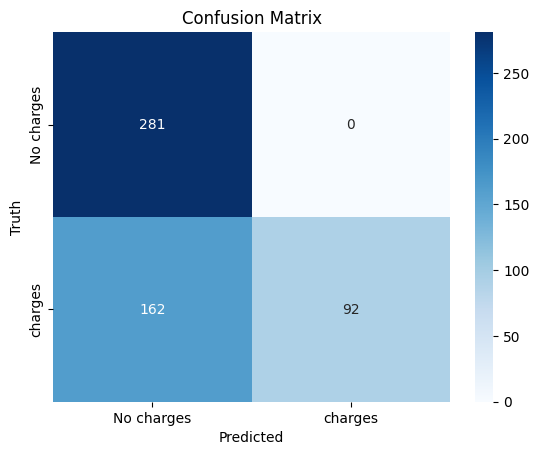

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No charges", "charges"], yticklabels=["No charges", "charges"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep4 = classification_report(y_test4_nomulti, y_pred4)
print(classification_rep4)

              precision    recall  f1-score   support

           0       0.63      1.00      0.78       281
           1       1.00      0.36      0.53       254

    accuracy                           0.70       535
   macro avg       0.82      0.68      0.65       535
weighted avg       0.81      0.70      0.66       535



#Boosting(RandomForest)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

from matplotlib import pyplot as plt

80-20

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train1_nomulti, y_train1_nomulti)

RandomForestClassifier()

In [ ]:
y_pred1 = rf.predict(X_test1_nomulti)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test1_nomulti, y_pred1, digits=3))
print(confusion_matrix(y_test1_nomulti, y_pred1))

              precision    recall  f1-score   support

           0      0.637     0.931     0.756       145
           1      0.821     0.374     0.514       123

    accuracy                          0.675       268
   macro avg      0.729     0.653     0.635       268
weighted avg      0.722     0.675     0.645       268

[[135  10]
 [ 77  46]]


75-25

In [ ]:
rf.fit(X_train2_nomulti, y_train2_nomulti)

RandomForestClassifier()

In [ ]:
y_pred2 = rf.predict(X_test2_nomulti)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test2_nomulti, y_pred2, digits=3))
print(confusion_matrix(y_test2_nomulti, y_pred2))

              precision    recall  f1-score   support

           0      0.635     0.869     0.734       176
           1      0.755     0.447     0.561       159

    accuracy                          0.669       335
   macro avg      0.695     0.658     0.648       335
weighted avg      0.692     0.669     0.652       335

[[153  23]
 [ 88  71]]


70-30

In [ ]:
rf.fit(X_train3_nomulti, y_train3_nomulti)

RandomForestClassifier()

In [ ]:
y_pred3 = rf.predict(X_test3_nomulti)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test3_nomulti, y_pred3, digits=3))
print(confusion_matrix(y_test3_nomulti, y_pred3))

              precision    recall  f1-score   support

           0      0.655     0.872     0.748       211
           1      0.777     0.492     0.603       191

    accuracy                          0.692       402
   macro avg      0.716     0.682     0.675       402
weighted avg      0.713     0.692     0.679       402

[[184  27]
 [ 97  94]]


60-40

In [ ]:
rf.fit(X_train4_nomulti, y_train4_nomulti)

RandomForestClassifier()

In [ ]:
y_pred4 = rf.predict(X_test4_nomulti)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test4_nomulti, y_pred4, digits=3))
print(confusion_matrix(y_test4_nomulti, y_pred4))

              precision    recall  f1-score   support

           0      0.659     0.886     0.756       281
           1      0.796     0.492     0.608       254

    accuracy                          0.699       535
   macro avg      0.727     0.689     0.682       535
weighted avg      0.724     0.699     0.686       535

[[249  32]
 [129 125]]


#XG Boost

In [ ]:
import xgboost as xgb

#Train the XGboost Model for Classification
model1 = xgb.XGBClassifier()
model2 = xgb.XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)
model3 = xgb.XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.2, subsample=0.5)

80-20

In [ ]:
train_model1 = model1.fit(X_train1_nomulti, y_train1_nomulti)
train_model2 = model2.fit(X_train1_nomulti, y_train1_nomulti)

In [ ]:
#prediction and Classification Report
from sklearn.metrics import classification_report

pred1 = train_model1.predict(X_test1_nomulti)
pred2 = train_model2.predict(X_test1_nomulti)

print('Model 1 XGboost Report %r' % (classification_report(y_test1_nomulti, pred1)))
print('Model 2 XGboost Report %r' % (classification_report(y_test1_nomulti, pred2)))

Model 1 XGboost Report '              precision    recall  f1-score   support\n\n           0       0.65      0.92      0.76       145\n           1       0.82      0.41      0.54       123\n\n    accuracy                           0.69       268\n   macro avg       0.73      0.67      0.65       268\nweighted avg       0.73      0.69      0.66       268\n'
Model 2 XGboost Report '              precision    recall  f1-score   support\n\n           0       0.65      0.95      0.77       145\n           1       0.87      0.39      0.54       123\n\n    accuracy                           0.69       268\n   macro avg       0.76      0.67      0.66       268\nweighted avg       0.75      0.69      0.66       268\n'


In [ ]:
#Let's use accuracy score
from sklearn.metrics import accuracy_score

print("Accuracy for model 1: %.2f" % (accuracy_score(y_test1_nomulti, pred1) * 100))
print("Accuracy for model 2: %.2f" % (accuracy_score(y_test1_nomulti, pred2) * 100))

Accuracy for model 1: 68.66
Accuracy for model 2: 69.40


In [ ]:
train_model3 = model3.fit(X_train1_nomulti, y_train1_nomulti)
pred3 = train_model3.predict(X_test1_nomulti)
print("Accuracy for model 3: %.2f" % (accuracy_score(y_test1_nomulti, pred3) * 100))

Accuracy for model 3: 68.66


In [ ]:
xgb2 = xgb.XGBClassifier(
 learning_rate =0.7,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

train_model7 = xgb2.fit(X_train1_nomulti, y_train1_nomulti)
pred7 = train_model7.predict(X_test1_nomulti)
print("Accuracy for model 7: %.2f" % (accuracy_score(y_test1_nomulti, pred7) * 100))

Accuracy for model 7: 68.66


In [ ]:
#Let's train a fast RandomForest on the dataset
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_train1_nomulti, y_train1_nomulti)
pred8 = rfc_model.predict(X_test1_nomulti)
print("Accuracy for Random Forest Model: %.2f" % (accuracy_score(y_test1_nomulti, pred8) * 100))

Accuracy for Random Forest Model: 68.66


75-25

In [ ]:
train_model1 = model1.fit(X_train2_nomulti, y_train2_nomulti)
train_model2 = model2.fit(X_train2_nomulti, y_train2_nomulti)

In [ ]:
#prediction and Classification Report
from sklearn.metrics import classification_report

pred1 = train_model1.predict(X_test2_nomulti)
pred2 = train_model2.predict(X_test2_nomulti)
pred3 = train_model3.predict(X_test2_nomulti)

print('Model 1 XGboost Report %r' % (classification_report(y_test2_nomulti, pred1)))
print('Model 2 XGboost Report %r' % (classification_report(y_test2_nomulti, pred2)))

Model 1 XGboost Report '              precision    recall  f1-score   support\n\n           0       0.64      0.88      0.74       176\n           1       0.77      0.46      0.57       159\n\n    accuracy                           0.68       335\n   macro avg       0.71      0.67      0.66       335\nweighted avg       0.70      0.68      0.66       335\n'
Model 2 XGboost Report '              precision    recall  f1-score   support\n\n           0       0.65      0.90      0.75       176\n           1       0.80      0.47      0.59       159\n\n    accuracy                           0.69       335\n   macro avg       0.73      0.68      0.67       335\nweighted avg       0.72      0.69      0.68       335\n'


In [ ]:
#Let's use accuracy score
from sklearn.metrics import accuracy_score

print("Accuracy for model 1: %.2f" % (accuracy_score(y_test2_nomulti, pred1) * 100))
print("Accuracy for model 2: %.2f" % (accuracy_score(y_test2_nomulti, pred2) * 100))

Accuracy for model 1: 67.76
Accuracy for model 2: 69.25


In [ ]:
train_model3 = model3.fit(X_train2_nomulti, y_train2_nomulti)
pred3 = train_model3.predict(X_test2_nomulti)
print("Accuracy for model 3: %.2f" % (accuracy_score(y_test2_nomulti, pred3) * 100))

Accuracy for model 3: 67.46


In [ ]:
xgb2 = xgb.XGBClassifier(
 learning_rate =0.7,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

train_model7 = xgb2.fit(X_train2_nomulti, y_train2_nomulti)
pred7 = train_model7.predict(X_test2_nomulti)
print("Accuracy for model 7: %.2f" % (accuracy_score(y_test2_nomulti, pred7) * 100))

Accuracy for model 7: 67.16


In [ ]:
#Let's train a fast RandomForest on the dataset
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_train2_nomulti, y_train2_nomulti)
pred8 = rfc_model.predict(X_test2_nomulti)
print("Accuracy for Random Forest Model: %.2f" % (accuracy_score(y_test2_nomulti, pred8) * 100))

Accuracy for Random Forest Model: 67.16


70-30

In [ ]:
train_model1 = model1.fit(X_train3_nomulti, y_train3_nomulti)
train_model2 = model2.fit(X_train3_nomulti, y_train3_nomulti)

In [ ]:
#prediction and Classification Report
from sklearn.metrics import classification_report

pred1 = train_model1.predict(X_test3_nomulti)
pred2 = train_model2.predict(X_test3_nomulti)
pred3 = train_model3.predict(X_test3_nomulti)

print('Model 1 XGboost Report %r' % (classification_report(y_test3_nomulti, pred1)))
print('Model 2 XGboost Report %r' % (classification_report(y_test3_nomulti, pred2)))

Model 1 XGboost Report '              precision    recall  f1-score   support\n\n           0       0.66      0.91      0.76       211\n           1       0.82      0.49      0.61       191\n\n    accuracy                           0.71       402\n   macro avg       0.74      0.70      0.69       402\nweighted avg       0.74      0.71      0.69       402\n'
Model 2 XGboost Report '              precision    recall  f1-score   support\n\n           0       0.67      0.90      0.76       211\n           1       0.81      0.50      0.62       191\n\n    accuracy                           0.71       402\n   macro avg       0.74      0.70      0.69       402\nweighted avg       0.74      0.71      0.70       402\n'


In [ ]:
#Let's use accuracy score
from sklearn.metrics import accuracy_score

print("Accuracy for model 1: %.2f" % (accuracy_score(y_test3_nomulti, pred1) * 100))
print("Accuracy for model 2: %.2f" % (accuracy_score(y_test3_nomulti, pred2) * 100))

Accuracy for model 1: 70.65
Accuracy for model 2: 70.90


In [ ]:
train_model3 = model3.fit(X_train3_nomulti, y_train3_nomulti)
pred3 = train_model3.predict(X_test3_nomulti)
print("Accuracy for model 3: %.2f" % (accuracy_score(y_test3_nomulti, pred3) * 100))

Accuracy for model 3: 70.90


In [ ]:
xgb2 = xgb.XGBClassifier(
 learning_rate =0.7,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

train_model7 = xgb2.fit(X_train3_nomulti, y_train3_nomulti)
pred7 = train_model7.predict(X_test3_nomulti)
print("Accuracy for model 7: %.2f" % (accuracy_score(y_test3_nomulti, pred7) * 100))

Accuracy for model 7: 68.66


In [ ]:
#Let's train a fast RandomForest on the dataset
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_train3_nomulti, y_train3_nomulti)
pred8 = rfc_model.predict(X_test3_nomulti)
print("Accuracy for Random Forest Model: %.2f" % (accuracy_score(y_test3_nomulti, pred8) * 100))

Accuracy for Random Forest Model: 70.90


60-40

In [ ]:
train_model1 = model1.fit(X_train4_nomulti, y_train4_nomulti)
train_model2 = model2.fit(X_train4_nomulti, y_train4_nomulti)

In [ ]:
#prediction and Classification Report
from sklearn.metrics import classification_report

pred1 = train_model1.predict(X_test4_nomulti)
pred2 = train_model2.predict(X_test4_nomulti)
pred3 = train_model3.predict(X_test4_nomulti)

print('Model 1 XGboost Report %r' % (classification_report(y_test4_nomulti, pred1)))
print('Model 2 XGboost Report %r' % (classification_report(y_test4_nomulti, pred2)))

Model 1 XGboost Report '              precision    recall  f1-score   support\n\n           0       0.66      0.84      0.74       281\n           1       0.75      0.53      0.62       254\n\n    accuracy                           0.69       535\n   macro avg       0.70      0.68      0.68       535\nweighted avg       0.70      0.69      0.68       535\n'
Model 2 XGboost Report '              precision    recall  f1-score   support\n\n           0       0.66      0.79      0.72       281\n           1       0.70      0.55      0.61       254\n\n    accuracy                           0.67       535\n   macro avg       0.68      0.67      0.67       535\nweighted avg       0.68      0.67      0.67       535\n'


In [ ]:
#Let's use accuracy score
from sklearn.metrics import accuracy_score

print("Accuracy for model 1: %.2f" % (accuracy_score(y_test4_nomulti, pred1) * 100))
print("Accuracy for model 2: %.2f" % (accuracy_score(y_test4_nomulti, pred2) * 100))

Accuracy for model 1: 69.16
Accuracy for model 2: 67.29


In [ ]:
train_model3 = model3.fit(X_train4_nomulti, y_train4_nomulti)
pred3 = train_model3.predict(X_test4_nomulti)
print("Accuracy for model 3: %.2f" % (accuracy_score(y_test4_nomulti, pred3) * 100))

Accuracy for model 3: 67.29


In [ ]:
xgb2 = xgb.XGBClassifier(
 learning_rate =0.7,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

train_model7 = xgb2.fit(X_train4_nomulti, y_train4_nomulti)
pred7 = train_model7.predict(X_test4_nomulti)
print("Accuracy for model 7: %.2f" % (accuracy_score(y_test4_nomulti, pred7) * 100))

Accuracy for model 7: 68.97


In [ ]:
#Let's train a fast RandomForest on the dataset
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_train4_nomulti, y_train4_nomulti)
pred8 = rfc_model.predict(X_test4_nomulti)
print("Accuracy for Random Forest Model: %.2f" % (accuracy_score(y_test4_nomulti, pred8) * 100))

Accuracy for Random Forest Model: 69.35


#Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# Initialize base estimator
base_estimator = DecisionTreeClassifier(max_depth=3)  # Shallow trees typically work well with AdaBoost

# Initialize AdaBoost model with the base estimator
adaboost = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, learning_rate=1.0, random_state=42)

80-20

In [ ]:
# Train the model on the training data
adaboost.fit(X_train1_nomulti, y_train1_nomulti)

# Predict on the test set
y_pred1 = adaboost.predict(X_test1_nomulti)

# Calculate accuracy
accuracy = accuracy_score(y_test1_nomulti, y_pred1)
print("Accuracy:", accuracy)

Accuracy: 0.6828358208955224


75-25

In [ ]:
# Train the model on the training data
adaboost.fit(X_train2_nomulti, y_train2_nomulti)

# Predict on the test set
y_pred2 = adaboost.predict(X_test2_nomulti)

# Calculate accuracy
accuracy = accuracy_score(y_test2_nomulti, y_pred2)
print("Accuracy:", accuracy)

Accuracy: 0.6865671641791045


70-30

In [ ]:
# Train the model on the training data
adaboost.fit(X_train3_nomulti, y_train3_nomulti)

# Predict on the test set
y_pred3 = adaboost.predict(X_test3_nomulti)

# Calculate accuracy
accuracy = accuracy_score(y_test3_nomulti, y_pred3)
print("Accuracy:", accuracy)

Accuracy: 0.7039800995024875


60-40

In [ ]:
# Train the model on the training data
adaboost.fit(X_train4_nomulti, y_train4_nomulti)

# Predict on the test set
y_pred4 = adaboost.predict(X_test4_nomulti)

# Calculate accuracy
accuracy = accuracy_score(y_test4_nomulti, y_pred4)
print("Accuracy:", accuracy)

Accuracy: 0.7009345794392523


#ANN


In [ ]:
import tensorflow as tf

In [ ]:
tf.random.set_seed(42)

# STEP 1: Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP 2: Compiling the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # Corrected here
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')  # Removed typo 'a=recall'
    ]
)

# STEP 3: Fit the model
history = model.fit(X_train1_nomulti, y_train1_nomulti, epochs=200)


Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5666 - loss: 0.6923 - precision: 0.5541 - recall: 0.8309
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6095 - loss: 0.6571 - precision: 0.6008 - recall: 0.7350
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6988 - loss: 0.5372 - precision: 0.9759 - recall: 0.4287
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7033 - loss: 0.5181 - precision: 1.0000 - recall: 0.4267
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7033 - loss: 0.5157 - precision: 1.0000 - recall: 0.4267
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7033 - loss: 0.5129 - precision: 1.0000 - recall: 0.4267
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7020 - loss: 0.5118 - precision: 0.9940 - recall: 0.4267
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7028 - loss: 0.5112 - precision: 0.9975 - recall: 0.4267
Epoch 9/200
34/34 ━━━━━━

<Axes: >

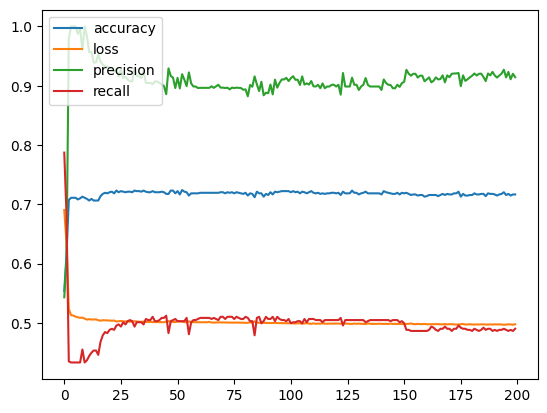

In [ ]:
pd.DataFrame(history.history).plot()

75:25

In [ ]:
tf.random.set_seed(42)

# STEP 1: Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP 2: Compiling the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # Corrected here
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')  # Removed typo 'a=recall'
    ]
)

# STEP 3: Fit the model
history = model.fit(X_train2_nomulti, y_train2_nomulti, epochs=200)


Epoch 1/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5279 - loss: 0.6958 - precision: 0.5192 - recall: 0.5161
Epoch 2/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6066 - loss: 0.6788 - precision: 0.5926 - recall: 0.7287
Epoch 3/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6598 - loss: 0.5934 - precision: 0.6966 - recall: 0.6005  
Epoch 4/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6801 - loss: 0.5169 - precision: 0.8258 - recall: 0.4782
Epoch 5/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6789 - loss: 0.5213 - precision: 0.8193 - recall: 0.4723 
Epoch 6/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6906 - loss: 0.5159 - precision: 0.8669 - recall: 0.4580
Epoch 7/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7154 - loss: 0.5168 - precision: 1.0000 - recall: 0.4334
Epoch 8/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7154 - loss: 0.5135 - precision: 1.0000 - recall: 0.4334
Epoch 9/200
32/32 ━━━

<Axes: >

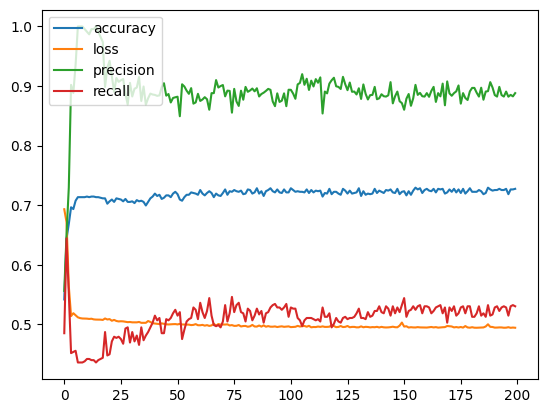

In [ ]:
pd.DataFrame(history.history).plot()

70:30

In [ ]:
tf.random.set_seed(42)

# STEP 1: Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP 2: Compiling the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # Corrected here
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')  # Removed typo 'a=recall'
    ]
)

# STEP 3: Fit the model
history = model.fit(X_train3_nomulti, y_train3_nomulti, epochs=200)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6187 - loss: 0.6771 - precision: 0.7234 - recall: 0.4039
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6842 - loss: 0.6149 - precision: 0.8800 - recall: 0.4335 
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7032 - loss: 0.5494 - precision: 0.9211 - recall: 0.4508 
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6935 - loss: 0.5375 - precision: 0.8258 - recall: 0.4949 
Epoch 5/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7036 - loss: 0.5278 - precision: 0.8956 - recall: 0.4638 
Epoch 6/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7033 - loss: 0.5283 - precision: 0.8851 - recall: 0.4725 
Epoch 7/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7007 - loss: 0.5263 - precision: 0.8659 - recall: 0.4797
Epoch 8/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7038 - loss: 0.5253 - precision: 0.9018 - recall: 0.4597 
Epoch 9/200
30/30 

<Axes: >

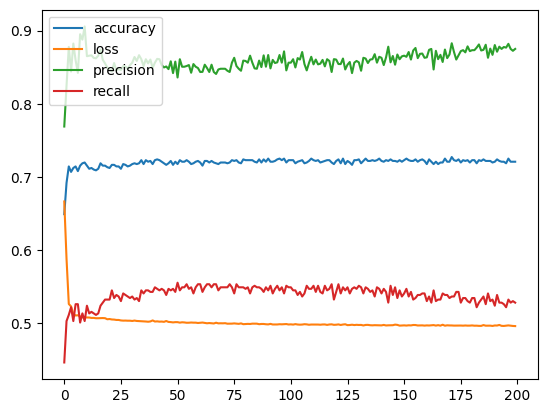

In [ ]:
pd.DataFrame(history.history).plot()

60:40

In [ ]:
tf.random.set_seed(42)

# STEP 1: Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP 2: Compiling the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # Corrected here
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')  # Removed typo 'a=recall'
    ]
)

# STEP 3: Fit the model
history = model.fit(X_train4_nomulti, y_train4_nomulti, epochs=200)

Epoch 1/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6234 - loss: 0.6680 - precision: 0.7421 - recall: 0.4265
Epoch 2/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7017 - loss: 0.5688 - precision: 0.8508 - recall: 0.5169 
Epoch 3/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7077 - loss: 0.5199 - precision: 0.8340 - recall: 0.5477 
Epoch 4/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7220 - loss: 0.5086 - precision: 0.8644 - recall: 0.5550 
Epoch 5/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7181 - loss: 0.5062 - precision: 0.8645 - recall: 0.5451 
Epoch 6/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7182 - loss: 0.5030 - precision: 0.8858 - recall: 0.5276 
Epoch 7/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7160 - loss: 0.5013 - precision: 0.8680 - recall: 0.5368 
Epoch 8/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7196 - loss: 0.5010 - precision: 0.8748 - recall: 0.5395
Epoch 9/200
26/26 

<Axes: >

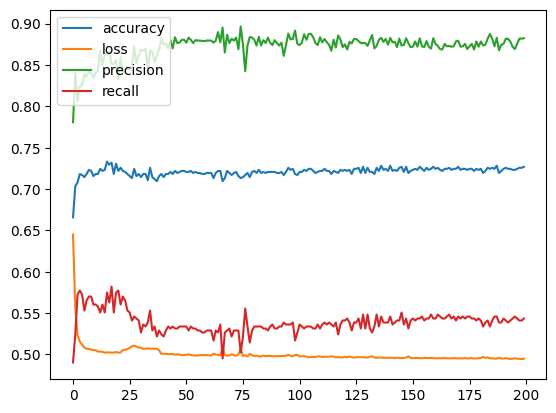

In [ ]:
pd.DataFrame(history.history).plot()